![Image](https://www.diabecare.org/images/thyroid-disorder.jpg)

In [1]:
# Importing Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import *
from sklearn.preprocessing import label_binarize
import warnings
warnings.filterwarnings("ignore")

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/thyroid-disease-data/thyroidDF.csv


In [3]:
#Creating DataFrame
df = pd.read_csv('/kaggle/input/thyroid-disease-data/thyroidDF.csv')
df.head(10)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
5,60,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803048
6,77,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,21.0,other,-,840803068
7,28,F,f,f,f,f,f,f,f,f,...,116.0,f,NaN,f,NaN,f,NaN,SVI,-,840807019
8,28,F,f,f,f,f,f,f,f,f,...,76.0,f,NaN,f,NaN,f,NaN,other,-,840808060
9,28,F,f,f,f,f,f,f,f,f,...,83.0,f,NaN,f,NaN,f,NaN,other,-,840808073


# Data Summary

In [4]:
# Total number of rows and columns
row, columns = df.shape
print(f'Total number of rows is: {row}')
print(f'Total number of columns is : {columns}')

Total number of rows is: 9172
Total number of columns is : 31


In [5]:
# Total number of duplicate rows
df.duplicated().sum()

0

In [6]:
# Total number of missing values in each column
df.isna().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

The dataset comprises 9,172 rows and 31 columns, with no duplicate entries. However, there are substantial missing values in the following columns: Sex, TSH, T3, TT4, T4U, FTI, and TBG.

# Data Inspection
To find the inherent characterstics of the data and its missing values, we need to examine it

In [7]:
# Unique values in 'sex' column
df['sex'].unique()

array(['F', 'M', nan], dtype=object)

In [8]:
#  Counts the frequency of each unique value in the 'sex' column
df['sex'].value_counts()

sex
F    6073
M    2792
Name: count, dtype: int64

In [9]:
# Unique values in 'TSH_measured' column
df['TSH_measured'].unique()

array(['t', 'f'], dtype=object)

In [10]:
# Filters the 'TSH' column for rows where 'TSH_measured' is 'f' and extracts unique values
df['TSH'][df['TSH_measured'] == 'f'].unique()

array([nan])

In [11]:
# Counts the number of missing TSH values for patients where TSH was not measured
df['TSH'][df['TSH_measured'] == 'f'].isnull().sum()

842

In [12]:
# Count of missing values in TSH
df['TSH'].isnull().sum()

842

It is evident from the analysis that null values in the 'TSH' column occur exclusively when the 'TSH_measured' column contains 'f'. This indicates that for patients whose TSH levels were not tested in the blood, there will be no corresponding test scores recorded.

In [13]:
# Unique values in 'T3_measured' column
df['T3_measured'].unique()

array(['f', 't'], dtype=object)

In [14]:
# Filters the 'T3' column for rows where 'T3_measured' is 'f' and extracts unique values
df['T3'][df['T3_measured'] == 'f'].unique()

array([nan])

In [15]:
# Counts the number of missing T3 values for patients where T3 was not measured
df['T3'][df['T3_measured'] == 'f'].isnull().sum()

2604

In [16]:
# Count of missing values in T3
df['T3'].isnull().sum()

2604

It is evident from the analysis that null values in the 'T3' column occur exclusively when the 'T3_measured' column contains 'f'. This indicates that for patients whose T3 levels were not tested in the blood, there will be no corresponding test scores recorded.

In [17]:
# Unique values in 'TT4_measured' column
df['TT4_measured'].unique()

array(['f', 't'], dtype=object)

In [18]:
# Filters the 'TT4' column for rows where 'TT4_measured' is 'f' and extracts unique values
df['TT4'][df['TT4_measured'] == 'f'].unique()

array([nan])

In [19]:
# Counts the number of missing TT4 values for patients where TT4 was not measured
df['TT4'][df['TT4_measured'] == 'f'].isnull().sum()

442

In [20]:
# Count of missing values in TT4
df['TT4'].isnull().sum()

442

It is evident from the analysis that null values in the 'TT4' column occur exclusively when the 'TT4_measured' column contains 'f'. This indicates that for patients whose TT4 levels were not tested in the blood, there will be no corresponding test scores recorded.

In [21]:
# Unique values in 'T4U_measured' column
df['T4U_measured'].unique()

array(['f', 't'], dtype=object)

In [22]:
# Filters the 'T4U' column for rows where 'T4U_measured' is 'f' and extracts unique values
df['T4U'][df['T4U_measured'] == 'f'].unique()

array([nan])

In [23]:
# Counts the number of missing T4U values for patients where T4U was not measured
df['T4U'][df['T4U_measured'] == 'f'].isnull().sum()

809

In [24]:
# Count of missing values in T4U
df['T4U'].isnull().sum()

809

It is evident from the analysis that null values in the 'T4U' column occur exclusively when the 'T4U_measured' column contains 'f'. This indicates that for patients whose T4U levels were not tested in the blood, there will be no corresponding test scores recorded.

In [25]:
# Unique values in 'FTI_measured' column
df['FTI_measured'].unique()

array(['f', 't'], dtype=object)

In [26]:
# Filters the 'FTI' column for rows where 'FTI_measured' is 'f' and extracts unique values
df['FTI'][df['FTI_measured'] == 'f'].unique()

array([nan])

In [27]:
# Counts the number of missing FTI values for patients where FTI was not measured
df['FTI'][df['FTI_measured'] == 'f'].isnull().sum()

802

In [28]:
# Count of missing values in FTI
df['FTI'].isnull().sum()

802


It is evident from the analysis that null values in the 'FTI' column occur exclusively when the 'FTI_measured' column contains 'f'. This indicates that for patients whose FTI levels were not tested in the blood, there will be no corresponding test scores recorded.

In [29]:
# Unique values in 'TBG_measured' column
df['TBG_measured'].unique()

array(['f', 't'], dtype=object)

In [30]:
# Filters the 'TBG' column for rows where 'TBG_measured' is 'f' and extracts unique values
df['TBG'][df['TBG_measured'] == 'f'].unique()

array([nan])

In [31]:
# Counts the number of missing TBG values for patients where TBG was not measured
df['TBG'][df['TBG_measured'] == 'f'].isnull().sum()

8823

In [32]:
# Count of missing values in TBG
df['TBG'].isnull().sum()

8823

It is evident from the analysis that null values in the 'TBG' column occur exclusively when the 'TBG_measured' column contains 'f'. This indicates that for patients whose TBG levels were not tested in the blood, there will be no corresponding test scores recorded.

**Conclusion:** 

The analysis clearly demonstrates that the presence of null values in the TSH, T3, TT4, T4U, FTI, and TBG columns is directly associated with the corresponding TSH_measured, T3_measured, TT4_measured, T4U_measured, FTI_measured, and TBG_measured columns containing the value 'f'. This indicates that for patients whose TSH, T3, TT4, T4U, FTI, and TBG levels were not measured during blood testing, no test results were recorded for these parameters.

# Feature Engineering

In [33]:
# Unique classes in 'target' column
df['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

**Diagnosis**

1. Hyperthyroid (A), T3 toxic (B), Toxic goitre (C), and Secondary toxic (D) are different Hyperthyroid conditions.

2. Hypothyroid (E), Primary Hypothyroid (F), Compensated Hypothyroid (G), and Secondary Hypothyroid (H) are different Hypothyroid conditions. 

3. "-" indicates no Thyroid conditions.

4. All Anti-thyroid treatments listed in this dataset, such as Antithyroid drugs (O), I131 treatment (P) and Surgery (Q) are recommended in case of Hyperthyroid Disorders.

5. Elevated thyroid hormones (T), also known as hyperthyroidism, occurs when the thyroid gland produces too many thyroid hormones.
 
6. Elevated Thyroxine-Binding Globulin (TBG) (S) is directly assocaited with Hyperthyroidism. 

In [34]:
# Categorizing different classes into 3 major thyroid conditions: Hyperthyroid, Hypothyroid and Negative (No Thyroid Condition)
hyperthyroid_conditions = ['A', 'B', 'C', 'D', 'O', 'P', 'Q', 'S', 'T']
hypothyroid_conditions = ['E', 'F', 'G', 'H']
normal_conditions = ['-']

def categorize_target(value):
    # Split the diagnosis into parts for compound cases
    diagnoses = value.split('|')
    # Check for hyperthyroid conditions
    for diagnosis in diagnoses:
        if diagnosis in hyperthyroid_conditions:
            return 'Hyperthyroid'
    # Check for hypothyroid conditions
    for diagnosis in diagnoses:
        if diagnosis in hypothyroid_conditions:
            return 'Hypothyroid'
            
    for diagnosis in diagnoses:
        if diagnosis in normal_conditions:
            return 'Negative'

#Applying 'categorize_target' function on 'target' column to categorize the values into 3 classes
df['target'] = df['target'].apply(categorize_target)

In [35]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target', 'patient_id'],
      dtype='object')

In [36]:
#Unique Classes in 'target' column
df['target'].unique()

array(['Negative', 'Hyperthyroid', 'Hypothyroid', None], dtype=object)

In [37]:
#  Counts the frequency of each unique classes in the 'target' column
df['target'].value_counts()

target
Negative        6771
Hypothyroid      601
Hyperthyroid     313
Name: count, dtype: int64

In [38]:
# Count the missing values in 'target' column
df['target'].isnull().sum()

1487

## Data Cleaning
To address these missing values, appropriate imputation methods will be applied:

1. Missing values in the Sex column will be imputed using the mode of that column.
2. Missing values in TSH, T3, TT4, T4U, and FTI will be filled with the median of the respective columns.
3. Due to an excessive amount of missing values in the TBG column, it will be dropped to prevent any potential inconsistencies.

In [39]:
# Imputing the missing values in 'sex' column with mode of the column
sex_mode = df['sex'].mode()[0]
sex_mode

'F'

In [40]:
# Imputing the missing values in 'sex' column with its mode
df['sex'] = df['sex'].fillna(sex_mode)
df['sex'].isna().sum()

0

In [41]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target', 'patient_id'],
      dtype='object')

In [42]:
# List of columns that will be dropped
col_to_drop = ['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'patient_id']

In [43]:
# Dropping the columns in the 'col_to_drop' list
df.drop(col_to_drop, axis = 1, inplace = True)

In [44]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'TBG', 'referral_source', 'target'],
      dtype='object')

In [45]:
# List of columns containing missing values
col_with_null = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

In [46]:
# Imputing the missing values in columns, in 'col_with_null' list, with 0
for col in col_with_null:
    df[col] = df[col].fillna(0)

In [47]:
# Count of missing values in each column
df.isnull().sum()

age                       0
sex                       0
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH                       0
T3                        0
TT4                       0
T4U                       0
FTI                       0
TBG                       0
referral_source           0
target                 1487
dtype: int64

In [48]:
# Dropping the missing values
df.dropna(inplace=True)

In [49]:
# Count of missing values in each column
df.isnull().sum()

age                    0
sex                    0
on_thyroxine           0
query_on_thyroxine     0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
TSH                    0
T3                     0
TT4                    0
T4U                    0
FTI                    0
TBG                    0
referral_source        0
target                 0
dtype: int64

In [50]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,referral_source,target
0,29,F,f,f,f,f,f,f,f,t,...,f,f,0.3,0.0,0.0,0.00,0.0,0.0,other,Negative
1,29,F,f,f,f,f,f,f,f,f,...,f,f,1.6,1.9,128.0,0.00,0.0,0.0,other,Negative
2,41,F,f,f,f,f,f,f,f,f,...,f,f,0.0,0.0,0.0,0.00,0.0,11.0,other,Negative
3,36,F,f,f,f,f,f,f,f,f,...,f,f,0.0,0.0,0.0,0.00,0.0,26.0,other,Negative
4,32,F,f,f,f,f,f,f,f,f,...,f,f,0.0,0.0,0.0,0.00,0.0,36.0,other,Hyperthyroid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,70,F,f,f,f,f,f,f,f,f,...,f,f,0.0,0.0,88.0,0.74,119.0,0.0,SVI,Negative
9167,56,M,f,f,f,f,f,f,f,f,...,f,f,0.0,0.0,64.0,0.83,77.0,0.0,SVI,Negative
9168,22,M,f,f,f,f,f,f,f,f,...,f,f,0.0,0.0,91.0,0.92,99.0,0.0,SVI,Negative
9170,47,F,f,f,f,f,f,f,f,f,...,f,f,0.0,0.0,75.0,0.85,88.0,0.0,other,Negative


In [51]:
# Unique values in the columns with 'object' data type'
for i in df.columns:
    if df[i].dtype == 'object':
        print(f'Unique values in {i}: {df[i].unique()}')

Unique values in sex: ['F' 'M']
Unique values in on_thyroxine: ['f' 't']
Unique values in query_on_thyroxine: ['f' 't']
Unique values in on_antithyroid_meds: ['f' 't']
Unique values in sick: ['f' 't']
Unique values in pregnant: ['f' 't']
Unique values in thyroid_surgery: ['f' 't']
Unique values in I131_treatment: ['f' 't']
Unique values in query_hypothyroid: ['t' 'f']
Unique values in query_hyperthyroid: ['f' 't']
Unique values in lithium: ['f' 't']
Unique values in goitre: ['f' 't']
Unique values in tumor: ['f' 't']
Unique values in hypopituitary: ['f']
Unique values in psych: ['f' 't']
Unique values in referral_source: ['other' 'SVI' 'SVHC' 'STMW' 'SVHD' 'WEST']
Unique values in target: ['Negative' 'Hyperthyroid' 'Hypothyroid']


In [52]:
#Shape of df
df.shape

(7685, 24)

Since the 'hypopituitary' column contains only a single unique value, it is unlikely to contribute to pattern recognition or enhance the performance of a data model.

In [53]:
# Dropping 'hypopituitary' column
df.drop('hypopituitary', axis = 1, inplace = True)

In [54]:
df.shape

(7685, 23)

In [55]:
#Unique values in 'age' column
df['age'].unique()

array([   29,    41,    36,    32,    60,    77,    28,    54,    42,
          51,    37,    16,    43,    63,    40,    56,    85,    67,
          61,    46,    44,    82,    64,    70,    33,    53,    52,
          59,    49,    35,    48,    27,    69,    76,    73,    68,
          66,    30,    58,    21,    38,    45,    62,    25,    86,
          83,    75,    72,    55,    14,    15,    39,    20,    80,
          90,    23,    13,    78,    24,    71,    81,    92,    57,
          74,     9,    47,    17,    11,    50,    26,    34,     8,
          79,    31,    65,    84,    12,    10,    88,    18,     1,
          22,     2,    97,     6,    19,    89,    87,   455,    91,
          94,     7, 65511,     4, 65512,     3,    93, 65526,     5,
          95])

There are some discrepencies in the 'age' column. It is containing values like 455, 65511, 65512, and 65526.

In [56]:
# Filtering the values in 'age' column
df = df[df['age'] <= 100]

# Unique values in 'age' column
df['age'].unique()

array([29, 41, 36, 32, 60, 77, 28, 54, 42, 51, 37, 16, 43, 63, 40, 56, 85,
       67, 61, 46, 44, 82, 64, 70, 33, 53, 52, 59, 49, 35, 48, 27, 69, 76,
       73, 68, 66, 30, 58, 21, 38, 45, 62, 25, 86, 83, 75, 72, 55, 14, 15,
       39, 20, 80, 90, 23, 13, 78, 24, 71, 81, 92, 57, 74,  9, 47, 17, 11,
       50, 26, 34,  8, 79, 31, 65, 84, 12, 10, 88, 18,  1, 22,  2, 97,  6,
       19, 89, 87, 91, 94,  7,  4,  3, 93,  5, 95])

In [57]:
df.shape

(7681, 23)

In [58]:
# Checking whether data has any anomalies where patient is male but have 'true' in 'pregnant' column
df[(df['sex']=='Male') & (df['pregnant'] == 't')]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,psych,TSH,T3,TT4,T4U,FTI,TBG,referral_source,target


There are no instances in the dataset where a "Male" is marked as "pregnant." This is a logical result and validates the integrity of the data for this specific condition. In such cases, we can infer that:

* The dataset does not contain biologically implausible entries for this scenario.
* The data aligns with expected real-world constraints (assuming there are no labeling or data entry errors).

In [59]:
# Creating a copy of 'df' without any null values for data visualization
df1 = df.copy()

## Data Encoding

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7681 entries, 0 to 9171
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7681 non-null   int64  
 1   sex                  7681 non-null   object 
 2   on_thyroxine         7681 non-null   object 
 3   query_on_thyroxine   7681 non-null   object 
 4   on_antithyroid_meds  7681 non-null   object 
 5   sick                 7681 non-null   object 
 6   pregnant             7681 non-null   object 
 7   thyroid_surgery      7681 non-null   object 
 8   I131_treatment       7681 non-null   object 
 9   query_hypothyroid    7681 non-null   object 
 10  query_hyperthyroid   7681 non-null   object 
 11  lithium              7681 non-null   object 
 12  goitre               7681 non-null   object 
 13  tumor                7681 non-null   object 
 14  psych                7681 non-null   object 
 15  TSH                  7681 non-null   float6

In [61]:
# Unique values in the columns with 'object' data type' and appending the column names in the list 'obj_col'
obj_col = []
for i in df.columns:
    if df[i].dtype == 'object':
        print(f'Unique values in {i}: {df[i].unique()}')
        obj_col.append(i)

Unique values in sex: ['F' 'M']
Unique values in on_thyroxine: ['f' 't']
Unique values in query_on_thyroxine: ['f' 't']
Unique values in on_antithyroid_meds: ['f' 't']
Unique values in sick: ['f' 't']
Unique values in pregnant: ['f' 't']
Unique values in thyroid_surgery: ['f' 't']
Unique values in I131_treatment: ['f' 't']
Unique values in query_hypothyroid: ['t' 'f']
Unique values in query_hyperthyroid: ['f' 't']
Unique values in lithium: ['f' 't']
Unique values in goitre: ['f' 't']
Unique values in tumor: ['f' 't']
Unique values in psych: ['f' 't']
Unique values in referral_source: ['other' 'SVI' 'SVHC' 'STMW' 'SVHD' 'WEST']
Unique values in target: ['Negative' 'Hyperthyroid' 'Hypothyroid']


In [62]:
obj_col

['sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_meds',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'psych',
 'referral_source',
 'target']

In [63]:
# Creating an object for Label Encoder Class
le = LabelEncoder()

In [64]:
# Create mappings for categorical variables
sex_map = {'F':0, 'M':1}
obj_col_map = {'f':0, 't':1}

In [65]:
# Apply 'sex_map' on 'sex' column
df['sex'] = df['sex'].map(sex_map)

In [66]:
# Label Encoding the 'referral_source' column
df['referral_source'] = le.fit_transform(df['referral_source'])

In [67]:
# Apply 'obj_col_map' on columns with 'object' data type, except the 'target' column
for i in df.columns:
    if df[i].dtype == 'object' and i != 'target':
        df[i] = df[i].map(obj_col_map)

In [68]:
for i in obj_col:
        print(f'Unique values in {i}: {df[i].unique()}')

Unique values in sex: [0 1]
Unique values in on_thyroxine: [0 1]
Unique values in query_on_thyroxine: [0 1]
Unique values in on_antithyroid_meds: [0 1]
Unique values in sick: [0 1]
Unique values in pregnant: [0 1]
Unique values in thyroid_surgery: [0 1]
Unique values in I131_treatment: [0 1]
Unique values in query_hypothyroid: [1 0]
Unique values in query_hyperthyroid: [0 1]
Unique values in lithium: [0 1]
Unique values in goitre: [0 1]
Unique values in tumor: [0 1]
Unique values in psych: [0 1]
Unique values in referral_source: [5 3 1 0 2 4]
Unique values in target: ['Negative' 'Hyperthyroid' 'Hypothyroid']


In [69]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,psych,TSH,T3,TT4,T4U,FTI,TBG,referral_source,target
0,29,0,0,0,0,0,0,0,0,1,...,0,0,0.3,0.0,0.0,0.00,0.0,0.0,5,Negative
1,29,0,0,0,0,0,0,0,0,0,...,0,0,1.6,1.9,128.0,0.00,0.0,0.0,5,Negative
2,41,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.00,0.0,11.0,5,Negative
3,36,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.00,0.0,26.0,5,Negative
4,32,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.00,0.0,36.0,5,Hyperthyroid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,70,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,88.0,0.74,119.0,0.0,3,Negative
9167,56,1,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,64.0,0.83,77.0,0.0,3,Negative
9168,22,1,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,91.0,0.92,99.0,0.0,3,Negative
9170,47,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,75.0,0.85,88.0,0.0,5,Negative


# Data Visualization

In [70]:
# Create a dictionary to map gender codes to proper gender categories
gender_map = {'F': 'Female', 'M':'Male'}
df1['sex'] = df1['sex'].map(gender_map)
df1

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,psych,TSH,T3,TT4,T4U,FTI,TBG,referral_source,target
0,29,Female,f,f,f,f,f,f,f,t,...,f,f,0.3,0.0,0.0,0.00,0.0,0.0,other,Negative
1,29,Female,f,f,f,f,f,f,f,f,...,f,f,1.6,1.9,128.0,0.00,0.0,0.0,other,Negative
2,41,Female,f,f,f,f,f,f,f,f,...,f,f,0.0,0.0,0.0,0.00,0.0,11.0,other,Negative
3,36,Female,f,f,f,f,f,f,f,f,...,f,f,0.0,0.0,0.0,0.00,0.0,26.0,other,Negative
4,32,Female,f,f,f,f,f,f,f,f,...,f,f,0.0,0.0,0.0,0.00,0.0,36.0,other,Hyperthyroid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,70,Female,f,f,f,f,f,f,f,f,...,f,f,0.0,0.0,88.0,0.74,119.0,0.0,SVI,Negative
9167,56,Male,f,f,f,f,f,f,f,f,...,f,f,0.0,0.0,64.0,0.83,77.0,0.0,SVI,Negative
9168,22,Male,f,f,f,f,f,f,f,f,...,f,f,0.0,0.0,91.0,0.92,99.0,0.0,SVI,Negative
9170,47,Female,f,f,f,f,f,f,f,f,...,f,f,0.0,0.0,75.0,0.85,88.0,0.0,other,Negative


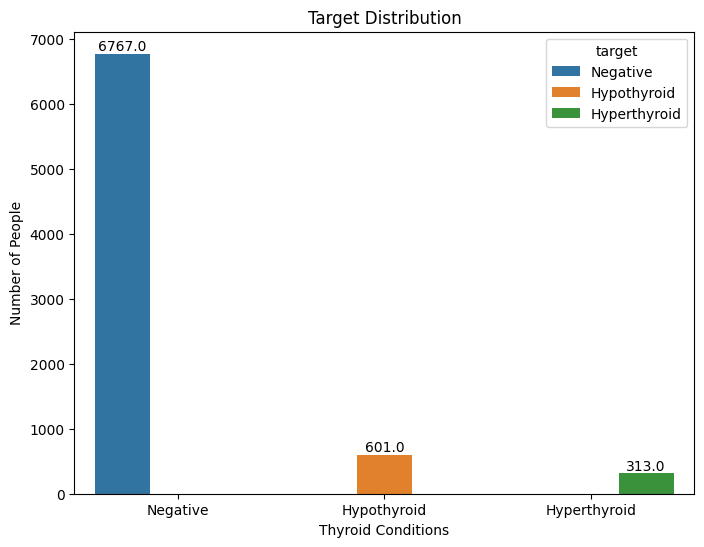

In [71]:
# Create a new dataframe 'target_df' by counting the occurrences of each unique value in the 'target' column of 'df1'
# and resetting the index to create new columns for the target value and its count.
target_df = df1['target'].value_counts().reset_index()

#Generate a bar plot
plt.figure(figsize = (8,6))
ax = sns.barplot(target_df, x='target', y='count', hue = 'target')

#Loop through each bar patch in the plot
for p in ax.patches:
    height = p.get_height()
    width = p.get_x() + p.get_width()/2
    # Annotate each bar with its corresponding count value
    ax.annotate(
    f'{float(height)}', 
    (p.get_x() + p.get_width() / 2., p.get_height()+1),
    ha='center', 
    va='center', 
    xytext=(0, 5), 
    textcoords='offset points'
    )

# Set the plot title, x-axis label, and y-axis label and display the plot
plt.title('Target Distribution')
plt.xlabel('Thyroid Conditions')
plt.ylabel('Number of People')
plt.show()

**Class Distribution**

**1. Negative Cases (6767):** <br>
* A vast majority (around 85.4%) of individuals in the dataset are classified as "Negative," meaning they do not have any thyroid condition.
* This dominance indicates a substantial class imbalance in the dataset, which is typical in medical datasets due to the relative rarity of diseases compared to healthy cases.
<br>

**2. Hypothyroid Cases (601):**
* Approximately 7.3% of individuals have been diagnosed with hypothyroidism.
* This is the second-largest class, suggesting that hypothyroidism is a relatively common thyroid condition compared to hyperthyroidism.
<br>

**3. Hyperthyroid Cases (313):** <br>
* Only about 3.9% of individuals have hyperthyroidism, making it the smallest group.
* This indicates that hyperthyroidism is less prevalent than hypothyroidism in this dataset.
<br>
<br>

**Imbalance Between Conditions:** <br>
1. The ratio of "Negative" cases to both "Hypothyroid" and "Hyperthyroid" cases highlights a significant imbalance.
2. Specifically:
    * For every hypothyroid case, there are roughly 11.3 negative cases.
    * For every hyperthyroid case, there are approximately 21.6 negative cases.

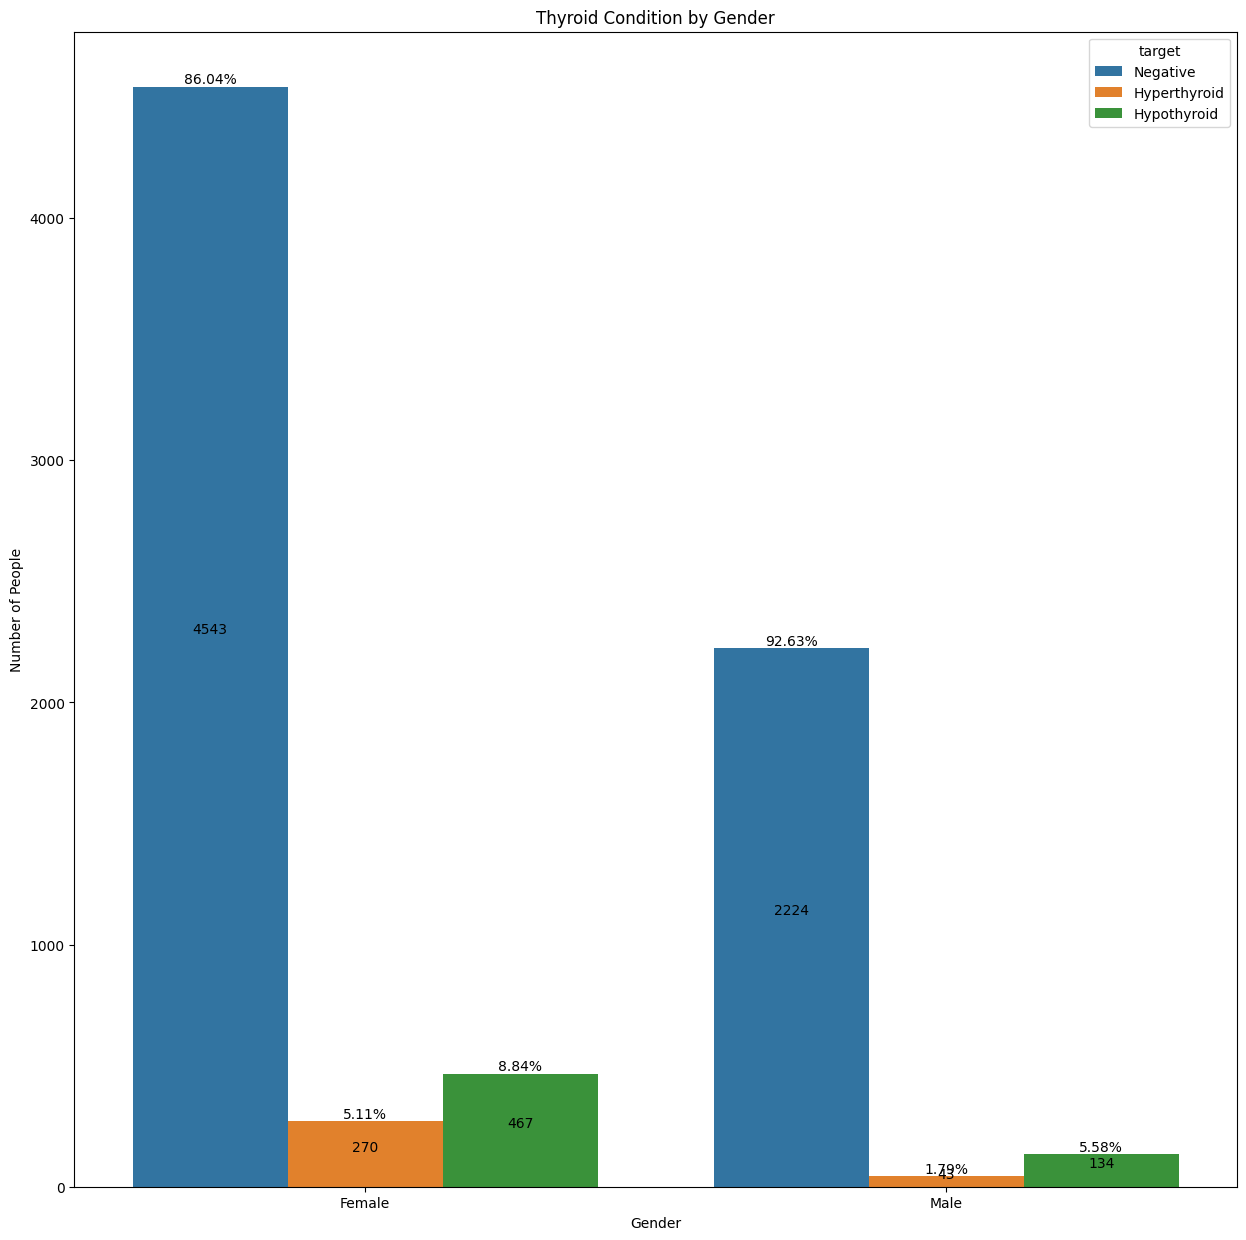

In [72]:
# Generate Count Plot
plt.figure(figsize = (15,15))
ax = sns.countplot(df1, x = 'sex', hue = 'target')

# Get the total counts for each gender
total_counts = df1['sex'].value_counts()

# Loop through each patch (bar) in the countplot
for p in ax.patches:
    height = p.get_height()
    width = p.get_x() + p.get_width()/2
    if p.get_x()<0.5:
        percentage = height/total_counts['Female'] *100
    else:
        percentage = height/total_counts['Male'] * 100
    # Annotate the percentage value above the bar with some offset
    ax.annotate(
        f'{percentage:.2f}%', 
        (p.get_x() + p.get_width() / 2., p.get_height()+1),
        ha='center', 
        va='center', 
        xytext=(0, 5), 
        textcoords='offset points'
    )
    # Annotate the raw count value in the middle of the bar with some offset
    ax.annotate(
        f'{int(height)}', 
        (p.get_x() + p.get_width() / 2., p.get_height()/2),
        ha='center', 
        va='center', 
        xytext=(0, 5), 
        textcoords='offset points'
    )

# Set axis labels and title for the plot and display the plot
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.title('Thyroid Condition by Gender')
plt.show()

**Insights:**

The prevalence of hyperthyroidism and hypothyroidism is higher in females compared to males, indicating that females are more likely to develop thyroid conditions.

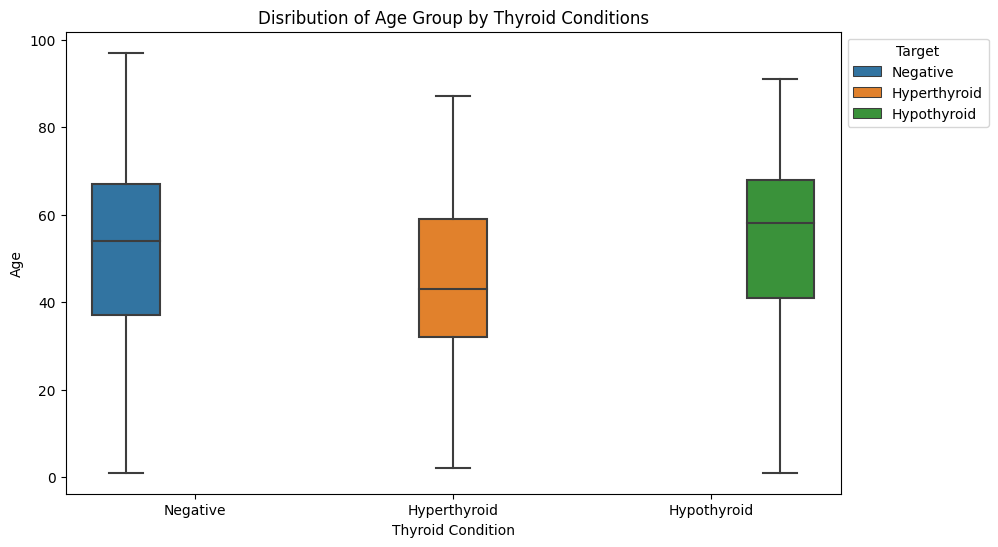

In [73]:
plt.figure(figsize = (10,6))
sns.boxplot(df1, x='target', y='age', hue = 'target', )
plt.title('Disribution of Age Group by Thyroid Conditions')
plt.xlabel('Thyroid Condition')
plt.ylabel('Age')
plt.legend(loc='best', frameon=True, title = 'Target', bbox_to_anchor=(1, 1))
plt.show()

**Inferences:**

1. Negative:
    * This class exhibits a broader distribution of ages compared to the other conditions, likely due to a higher number of individuals in this category.
    * Most individuals without a thyroid condition fall within the middle-aged group.
<br>
<br>
2. Hyperthyroid:
    * The age distribution for hyperthyroidism is relatively narrower, concentrated in younger to middle-aged individuals compared to the "Negative" class.
    * This suggests that hyperthyroidism is more prevalent among younger populations.
<br>
<br>
3. Hypothyroid:
    * The age distribution for hypothyroidism spans from middle-aged to slightly older individuals, with significant overlap with the "Negative" group.
    * This indicates that hypothyroidism predominantly affects older individuals compared to hyperthyroidism.

<br>
<br>


**Insights:**

1. Age and Condition Overlap:
    * There is a notable overlap in the age ranges for "Negative" and "Hypothyroid," with older individuals being more likely to belong to these groups compared to "Hyperthyroid."
    * Hyperthyroid cases are skewed toward younger individuals, with a median age much lower than "Negative" or "Hypothyroid."
    * Middle-aged individuals appear to be the most at risk of developing a thyroid condition across all categories.
<br>
<br>

2. Clinical Implication:
    * Screening strategies should prioritize middle-aged to older individuals for hypothyroidism detection.
    * For hyperthyroidism, the focus should be on younger to middle-aged individuals.

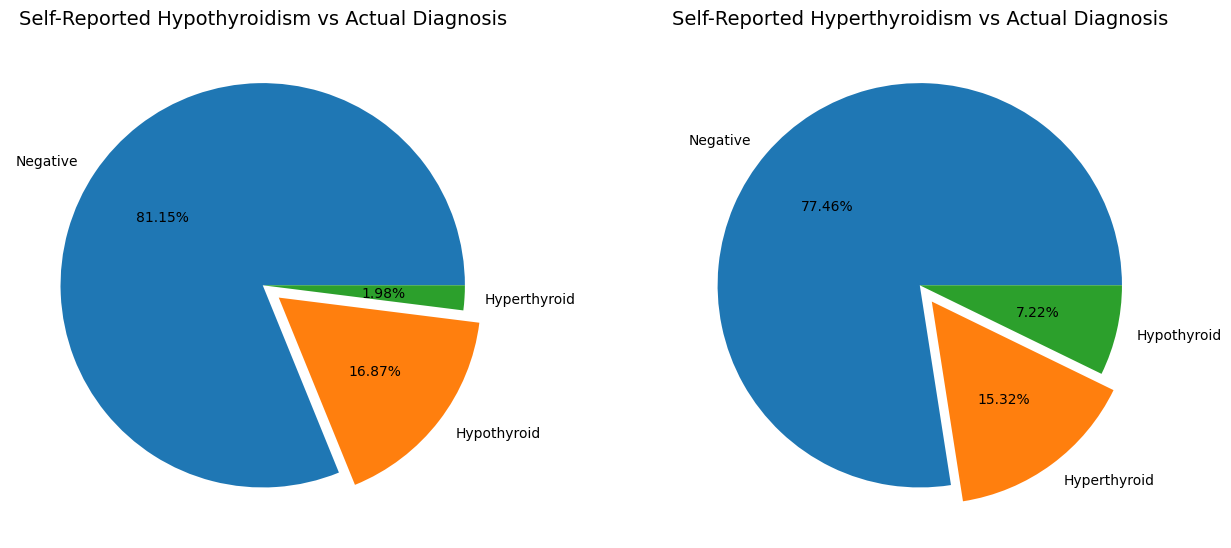

In [74]:
# Filter dataframes for self-reported conditions for Hypothyroid and Hyperthyroid,
# along with counts of target variable
df_query_hypo = df1[(df1['query_hypothyroid']=='t')]
df_query_hypo_counts = df_query_hypo['target'].value_counts()

df_query_hyper = df1[(df1['query_hyperthyroid']=='t')]
df_query_hyper_counts = df_query_hyper['target'].value_counts()

# Generate Pie charts in subplots for self-reported hypothyroidism  and Hyperthyroidism
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
plt.pie(df_query_hypo_counts, labels=df_query_hypo_counts.index, explode=[0,0.1,0], autopct='%1.2f%%')
plt.title('Self-Reported Hypothyroidism vs Actual Diagnosis', fontdict={'fontsize':14})


plt.subplot(1,2,2)
plt.pie(df_query_hyper_counts, labels=df_query_hyper_counts.index, explode=[0,0.1,0], autopct='%1.2f%%')
plt.title('Self-Reported Hyperthyroidism vs Actual Diagnosis', fontdict={'fontsize':14})

# Display plots after adjusting the space between subplots
plt.subplots_adjust(wspace=0.3)
plt.show()

**Inferences**<br>

**1. Self-Reported Hypothyroidism vs Actual Diagnosis**
* **Negative Cases (81.15%):**<br>
The majority of individuals who self-reported hypothyroidism were diagnosed as negative (i.e., no thyroid condition).
This suggests that many individuals may mistakenly associate general symptoms with hypothyroidism without an actual clinical diagnosis.
<br>
<br>
* **Hypothyroid Cases (16.87%):**<br>
A significant proportion of self-reported cases were indeed diagnosed with hypothyroidism, indicating some alignment between self-awareness and actual medical conditions.
<br>
<br>
* **Hyperthyroid Cases (1.98%):**<br>
A very small fraction of self-reported hypothyroid cases were actually diagnosed with hyperthyroidism, showing minimal confusion between these two conditions.

**2. Self-Reported Hyperthyroidism vs Actual Diagnosis**
* **Negative Cases (77.46%):**<br>
Similar to hypothyroidism, most individuals who believed they had hyperthyroidism were found negative upon clinical diagnosis, suggesting over-reporting or misattribution of symptoms.
<br>
<br>
* **Hyperthyroid Cases (15.32%):**<br>
A smaller but still notable proportion of self-reported cases were confirmed to have hyperthyroidism, showing a moderate level of self-awareness.
<br>
<br>
* **Hypothyroid Cases (7.22%):**<br>
A non-trivial proportion of individuals who believed they had hyperthyroidism were instead diagnosed with hypothyroidism. This highlights potential confusion between the symptoms of hyperthyroidism and hypothyroidism.
<br>
<br>

**Insights**

In both hypothyroidism and hyperthyroidism, the majority of self-reported cases (81.15% and 77.46%, respectively) were clinically negative. This indicates a gap in symptom interpretation and understanding of thyroid conditions among patients. This indicates that symptom questionnaires alone may not be sufficient for pre-screening, thus bio-chemical tests remain essential.

In [75]:
# Creating a function for generating the clustered bar chart
def grouped_bar_chart(data, feature, target, title, xlabel): 
    count_data = data.groupby([feature, target]).size().unstack(fill_value=0)
    
    percentage_data = count_data.div(count_data.sum(axis=1), axis=0) * 100
    
    percentage_data = percentage_data.reset_index()
    
    # Melt the DataFrame to long format for seaborn
    percentage_melted = percentage_data.melt(id_vars=feature, var_name=target, value_name='Percentage')
    
    # Create the grouped bar plot
    plt.figure(figsize=(8,6))
    sns.barplot(data=percentage_melted, x=feature, y='Percentage', hue=target)
    
    # Annotate percentages on the bars
    for p in plt.gca().patches:
        plt.annotate(f'{p.get_height():.2f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=10, color='black', 
                     rotation=0, 
                     xytext=(0, 5), textcoords='offset points')
    # Setting titles, labels, legend and then display the plots
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=14)
    plt.legend(title='Thyroid Condition')
    plt.tight_layout()
    plt.show()

In [76]:
# Creating dataframe 'thyroxine_df' by grouping the 'on_thyroxine' and 'target' columns
# and counting the frequency of target classes
thyroxine_df = df1.groupby(['on_thyroxine', 'target'])['target'].count().reset_index(name = 'count')

# Map 'f' and 't' values in 'on_thyroxine' column of 'thyroxine_df' dataframe to 'False' and 'True' respectively
thyroxine_map = {'f':'False', 't':'True'}
thyroxine_df['on_thyroxine']= thyroxine_df['on_thyroxine'].map(thyroxine_map)
thyroxine_df

,on_thyroxine,target,count
0,False,Hyperthyroid,299
1,False,Hypothyroid,576
2,False,Negative,5949
3,True,Hyperthyroid,14
4,True,Hypothyroid,25
5,True,Negative,818


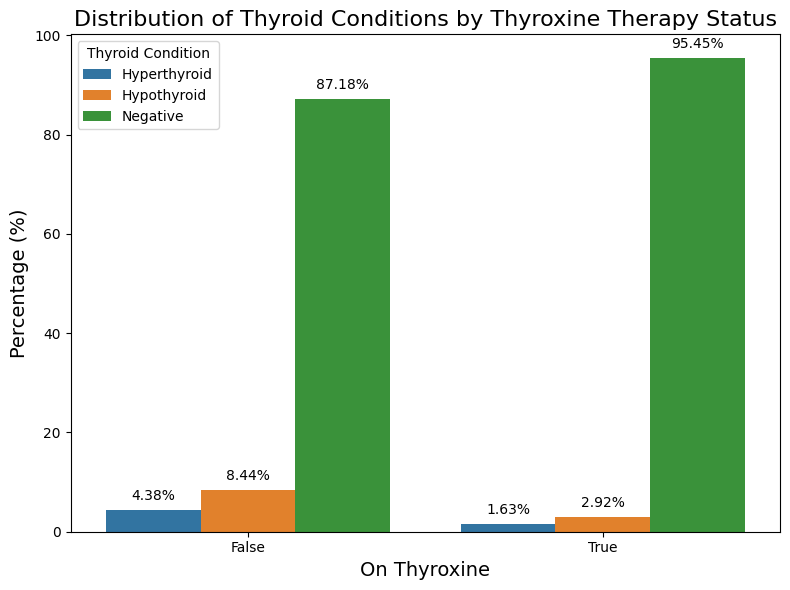

In [77]:
# Map 'f' and 't' values in 'on_thyroxine' column of 'df1' dataframe to 'False' and 'True' respectively
thyroxine_map = {'f':'False', 't':'True'}
df1['on_thyroxine'] = df1['on_thyroxine'].map(thyroxine_map)

# Creating a clustered bar chart between 'on_thyroxine' and 'target' columns
grouped_bar_chart(data = df1, feature='on_thyroxine', target = 'target', 
                  title = 'Distribution of Thyroid Conditions by Thyroxine Therapy Status',
                  xlabel= 'On Thyroxine'
                 )

**Inferences**<br>

**1. General Distribution for Patients Not on Thyroxine (False):** <br>
* **Negative Cases:** <br>
A significant majority of individuals not on thyroxine do not have any thyroid condition, as expected.
* **Hypothyroid Cases:** <br>
A notable portion of individuals not on thyroxine are diagnosed with hypothyroidism. This suggests that many hypothyroid patients might not yet be on thyroxine treatment or their condition is mild.
* **Hyperthyroid Cases:** <br>
A smaller proportion of patients not on thyroxine have hyperthyroidism, consistent with the overall lower prevalence of hyperthyroidism.
<br>

**2.General Distribution for Patients on Thyroxine (True):** <br>
* **Negative Cases:** <br>
A striking majority of individuals on thyroxine are classified as "Negative," which might indicate that these individuals are undergoing thyroxine therapy but their thyroid hormone levels are within normal ranges due to effective treatment.
* **Hypothyroid Cases:** <br>
A small percentage of individuals on thyroxine are classified as hypothyroid, potentially due to under-treatment or mismanagement of the condition.
* **Hyperthyroid Cases:** <br>
Very few hyperthyroid individuals are on thyroxine, reflecting its less common usage in managing hyperthyroidism compared to hypothyroidism
<br>
<br>

**Insights** <br>

**1. Effectiveness of Thyroxine in Managing Hypothyroidism:** <br>
The data suggests that thyroxine treatment is effective for many hypothyroid patients, bringing their thyroid levels to a "Negative" (normal) state. This explains the high proportion of "Negative" cases among individuals on thyroxine.


**2. Hypothyroid Cases Not Receiving Treatment:** <br>
The presence of 8.44% hypothyroid cases in the "False" group indicates that a portion of hypothyroid patients are not receiving thyroxine treatment. This could be due to lack of diagnosis, early-stage hypothyroidism, or patient non-compliance.


**3. Minimal Use of Thyroxine in Hyperthyroid Patients:** <br>
The low percentage of hyperthyroid cases in both "True" and "False" groups aligns with the clinical norm, as thyroxine is not a standard treatment for hyperthyroidism. Hyperthyroid conditions are typically managed with antithyroid drugs, radioactive iodine, or surgery.



In [78]:
# Map 'f' and 't' values in 'thyroid_surgery' column of 'df1' dataframe to 'False' and 'True' respectively
thyroid_surgery_map = {'f':'False', 't':'True'}
df1['thyroid_surgery'] = df1['thyroid_surgery'].map(thyroid_surgery_map)

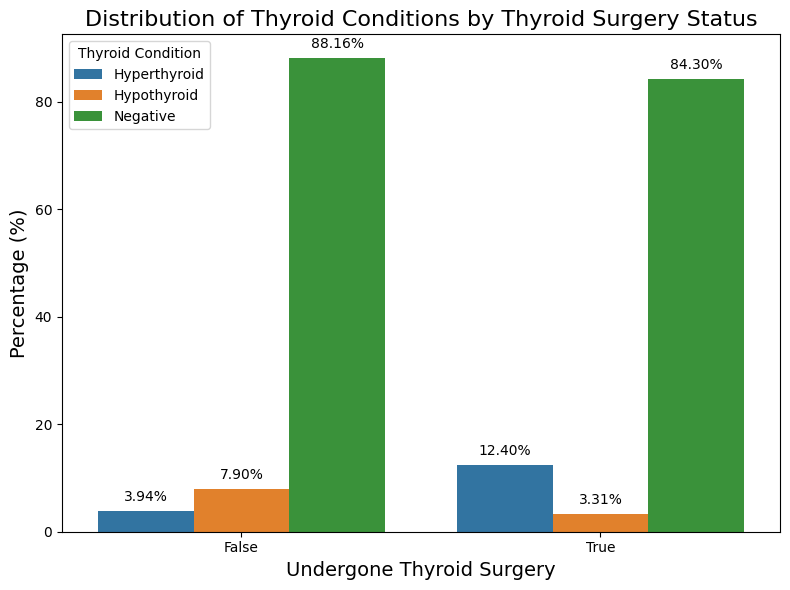

In [79]:
# Creating a clustered bar chart between 'thyroid_surgery' and 'target' columns
grouped_bar_chart(data=df1, feature='thyroid_surgery', target='target', 
                 title='Distribution of Thyroid Conditions by Thyroid Surgery Status',
                  xlabel='Undergone Thyroid Surgery'
                 )

**Inferences** <br>

* A higher proportion of patients with a history of thyroid surgery have hyperthyroidism compared to those without surgery (12.40% vs. 3.94%). This indicates that thyroid surgery is often linked with hyperthyroid conditions, either as a treatment or due to the progression of the disease.
* Interestingly, the proportion of hypothyroid cases is lower in this group compared to those without thyroid surgery (3.31% vs. 7.90%). This might suggest that thyroid surgery does not commonly result from hypothyroidism or that post-surgical hypothyroid cases are underrepresented.
* While still the majority, the percentage of "Negative" cases is slightly reduced compared to the group without surgery, suggesting that individuals with thyroid surgery are more likely to have a thyroid-related condition.
<br>
<br>

**Insights** <br>

**1. Surgical Correlation with Hyperthyroidism:** <br>
The higher percentage of hyperthyroid cases among those with a history of thyroid surgery implies a strong association. This could reflect surgical intervention being a common treatment for hyperthyroid conditions.


**2. Post-Surgical Monitoring:** <br>
The reduced percentage of hypothyroid cases among surgically treated patients might indicate successful management or resolution of hypothyroid conditions in this group. However, hypothyroidism as a side effect of surgery could also be explored further.

**3. Screening Implications:** <br>
Among patients without a history of thyroid surgery, the prevalence of both hyperthyroidism and hypothyroidism remains relatively low, suggesting that surgical history could be a helpful indicator for identifying patients at higher risk of thyroid conditions.

**4. Data Trends and Model Training:** <br>
The imbalance in the proportion of thyroid conditions between the "True" and "False" surgery groups highlights the need to account for thyroid_surgery as a potential predictor in any model. The relationship between surgery history and target class could provide valuable signals for classification.

In [80]:
# Map 'f' and 't' values in 'I131_treatment' to 'False' and 'True' respectively
bool_map = {'f':'False', 't':'True'}
df1['I131_treatment'] = df1['I131_treatment'].map(bool_map)

In [81]:
# Creating a dataframe by grouping the 'target' and 'I131_treament' columns and counting the frequency of target
# classes based on whether patients have recieved I131 treatment or not
i131_counts = df1.groupby('target')['I131_treatment'].value_counts().unstack()
i131_counts

I131_treatment,False,True
target,,
Hyperthyroid,302,11
Hypothyroid,588,13
Negative,6645,122


In [82]:
# Creating a dataframe by grouping the 'target' and 'thyroid_surgery' columns and counting the frequency of target
# classes based on whether patients have recieved surgery or not
surgery_counts = df1.groupby('target')['thyroid_surgery'].value_counts().unstack()
surgery_counts

thyroid_surgery,False,True
target,,
Hyperthyroid,298,15
Hypothyroid,597,4
Negative,6665,102


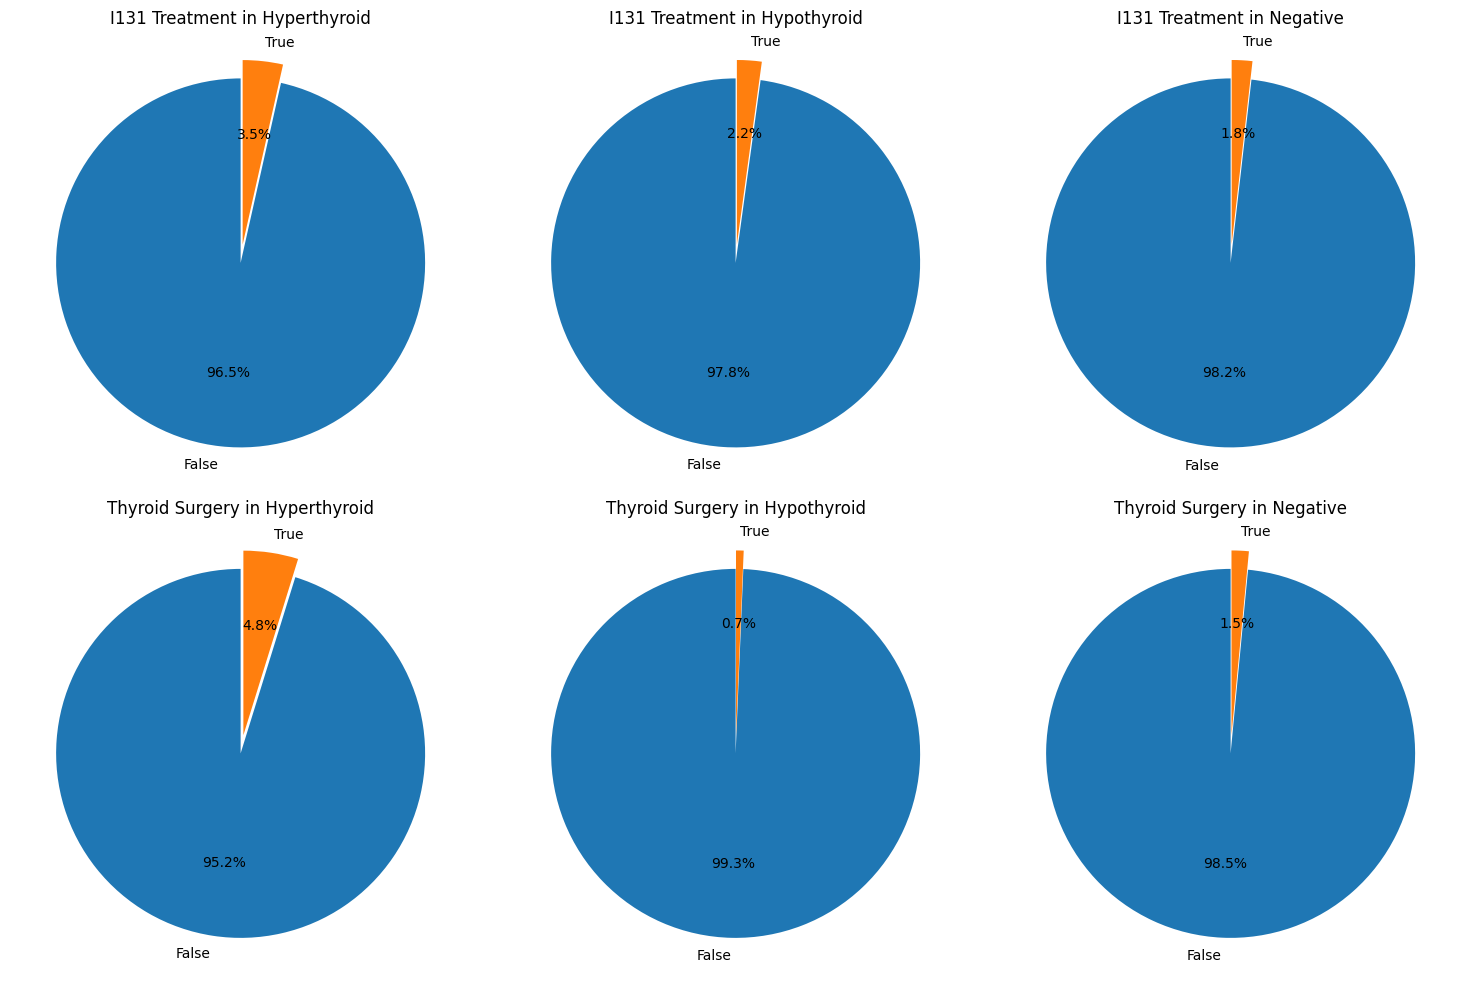

In [83]:
fig, axes = plt.subplots(2, len(df1['target'].unique()), figsize=(15, 10))

# Plot pie charts for i131_treatment
for i, target in enumerate(i131_counts.index):
    axes[0, i].pie(
        i131_counts.loc[target], 
        labels=i131_counts.columns, 
        autopct='%1.1f%%', 
        startangle=90, 
        explode=[0.1 if col == 'True' else 0 for col in i131_counts.columns]
    )
    axes[0, i].set_title(f"I131 Treatment in {target}")

# Plot pie charts for thyroid_surgery
for i, target in enumerate(surgery_counts.index):
    axes[1, i].pie(
        surgery_counts.loc[target], 
        labels=surgery_counts.columns, 
        autopct='%1.1f%%', 
        startangle=90, 
        explode=[0.1 if col == 'True' else 0 for col in surgery_counts.columns]
    )
    axes[1, i].set_title(f"Thyroid Surgery in {target}")

# Adjust layout
plt.tight_layout()
plt.show()

**Inferences** <br>

* The proportions of individuals receiving I131 treatment and Thyroid Surgery are higher in Hyperthyroid cases compared to Hypothyroid and Negative cases.
* This aligns with the use of I131 treatment and Thyroid Surgery for conditions like Hyperthyroidism.

**Insights** <br>

* Both I131 treatment and thyroid surgery are most prevalent in individuals with Hyperthyroid, reflecting standard treatment practices for severe cases.

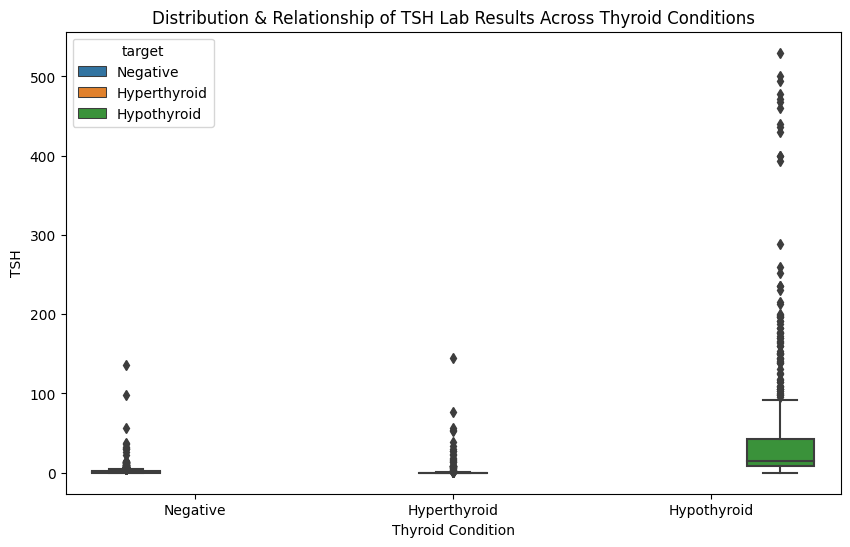

In [84]:
# Generating customized Box Plot between 'target' and 'TSH' column
plt.figure(figsize = (10,6))
sns.boxplot(df1, x='target', y='TSH', hue = 'target', )
plt.title('Distribution & Relationship of TSH Lab Results Across Thyroid Conditions')
plt.xlabel('Thyroid Condition')
plt.ylabel('TSH')
plt.show()


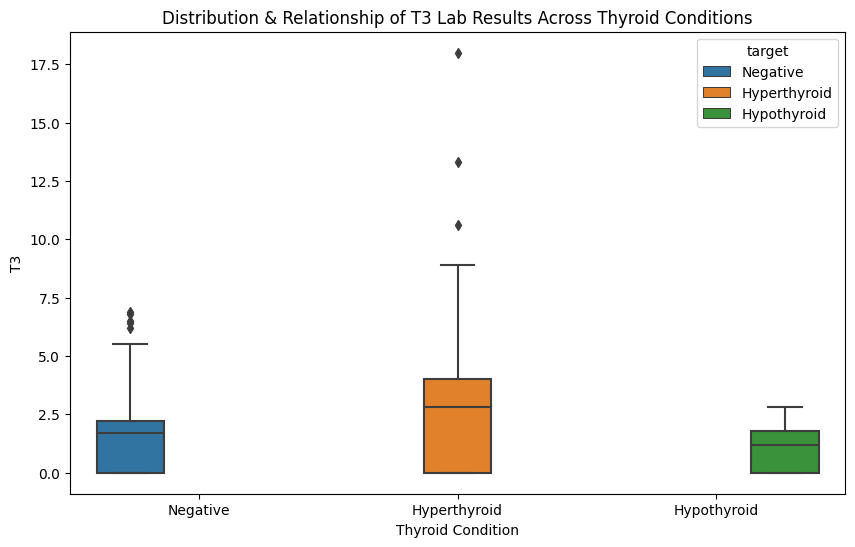

In [85]:
# Generating customized Box Plot between 'target' and 'T3' column
plt.figure(figsize = (10,6))
sns.boxplot(df1, x='target', y='T3', hue = 'target', )
plt.title('Distribution & Relationship of T3 Lab Results Across Thyroid Conditions')
plt.xlabel('Thyroid Condition')
plt.ylabel('T3')
plt.show()

**Inferences** <br>

**1. Overlap in Lower T3 Values:** <br>
* For T3 lab result values below 2.0, there is significant overlap among all three classes ("Negative," "Hypothyroid," and "Hyperthyroid").
* This overlap suggests that T3 alone may not be sufficient for accurate diagnosis in such cases, and other lab results (e.g., TSH, TT4) may be necessary to differentiate between thyroid conditions.
<br>

**2. Clear Diagnosis for Higher T3 Values:** <br>
* For T3 values exceeding 2.5, the diagnostic picture becomes more distinct, with "Hyperthyroid" cases emerging as the most prominent.
* This trend indicates that elevated T3 levels are strongly associated with hyperthyroidism, helping to differentiate it from other conditions.
<br>

**3. Outliers and Extreme Cases:** <br>
* While the "Negative" class includes some outliers, these may stem from potential misdiagnoses or other contributing factors (e.g., abnormalities in other lab results).
* On the other hand, "Hyperthyroid" cases are more commonly associated with extreme T3 values, with outliers reaching beyond 9.0. This highlights the likelihood of severe hyperthyroid conditions in patients with extremely high T3 levels.
<br>
<br>

**Insights** <br>

T3 lab results provide valuable insights, especially at higher levels. However, for cases with lower T3 values, additional diagnostic markers are essential to ensure accuracy and minimize misclassification.

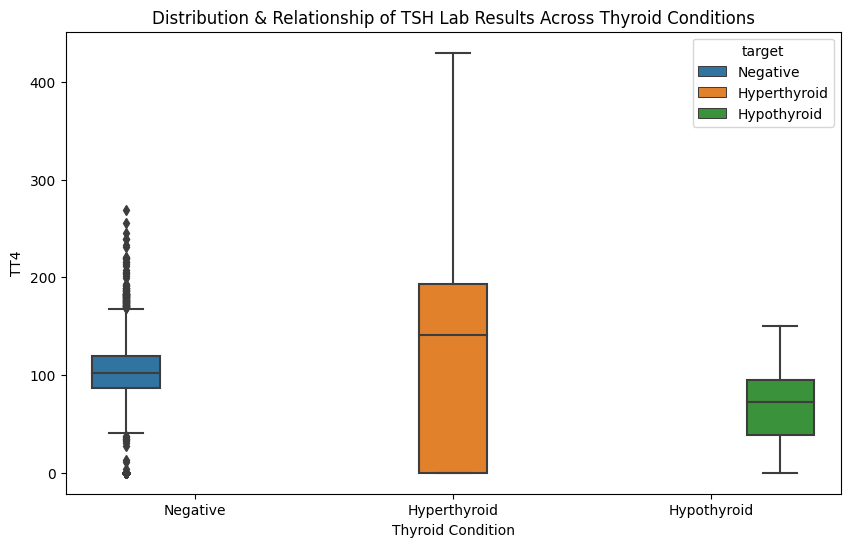

In [86]:
# Generating customized Box Plot between 'target' and 'TT4' column
plt.figure(figsize = (10,6))
sns.boxplot(df1, x='target', y='TT4', hue = 'target', )
plt.title('Distribution & Relationship of TSH Lab Results Across Thyroid Conditions')
plt.xlabel('Thyroid Condition')
plt.ylabel('TT4')
plt.show()

**Inferences** <br>

**1. Overlap in TT4 Values:** <br>

* For TT4 levels below 170, there is considerable overlap among the three classes ("Negative," "Hypothyroid," and "Hyperthyroid").
* This overlap indicates that TT4 alone is not a definitive diagnostic marker for distinguishing between thyroid conditions in this range.
* Accurate diagnosis in such cases likely requires additional information, such as other lab results (e.g., TSH, T3) or clinical evaluations.
<br>

**2. Presence of Outliers:**
* Among the three classes, only the "Negative" class exhibits significant outliers in TT4 values.
* These outliers could be indicative of potential misdiagnoses, lab testing errors, or the presence of other contributing factors, such as abnormalities in unrelated conditions.
<br>

**3. Association of Hyperthyroid Cases with High TT4 Values:**
* "Hyperthyroid" cases are predominantly linked with elevated TT4 levels, particularly at extreme values. This trend underscores the strong correlation between severe hyperthyroidism and extremely high TT4 levels under normal physiological conditions.
<br>
<br>


**Insights** <br>

TT4 lab results provide valuable insights, especially at higher levels. However, for cases with lower TT4 values, additional diagnostic markers are essential to ensure accuracy and minimize misclassification.

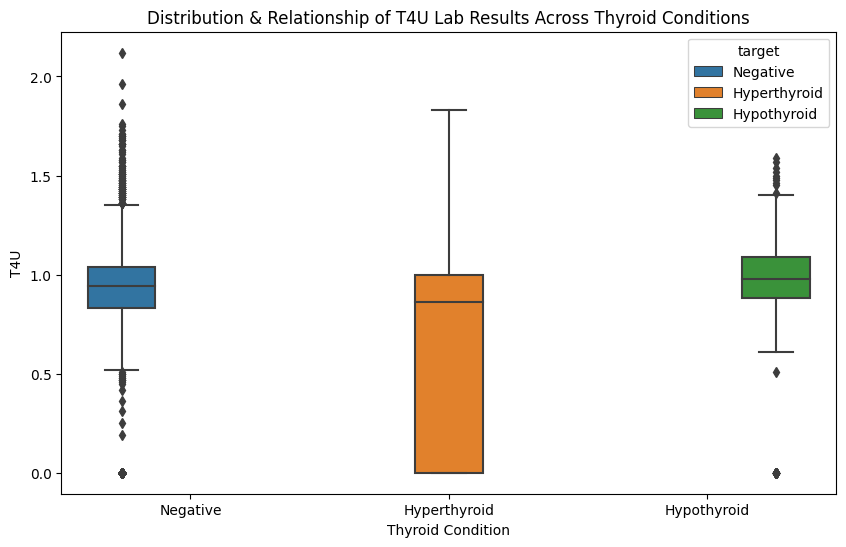

In [87]:
# Generating customized Box Plot between 'target' and 'T4U' column
plt.figure(figsize = (10,6))
sns.boxplot(df1, x='target', y='T4U', hue = 'target', )
plt.title('Distribution & Relationship of T4U Lab Results Across Thyroid Conditions')
plt.xlabel('Thyroid Condition')
plt.ylabel('T4U')
plt.show()

**Inferences** <br>

**1. Overlap in T4U Levels:** <br>
* At T4U levels near 1.5 and 0.5, there is significant overlap among the three classes: "Negative," "Hypothyroid," and "Hyperthyroid." This overlap indicates that T4U alone is insufficient as a standalone diagnostic marker to reliably differentiate between thyroid conditions in this range.
* Accurate diagnosis in such cases likely requires the inclusion of other lab results (e.g., TSH, TT4, or T3) and clinical evaluations.
<br>

**2. Presence of Outliers:** <br>
* Both the "Negative" and "Hyperthyroid" classes exhibit outliers above the 1.5 mark and below the 0.5 mark. These outliers could represent exceptional cases or potential misdiagnoses. They may also be influenced by interactions with other abnormal lab results, highlighting the importance of a holistic diagnostic approach.
<br>

**3. Association of Extreme T4U Values with Hyperthyroid Diagnosis:** <br>
* T4U levels exceeding 1.5 or falling below 0.5 are most often associated with a diagnosis of Hyperthyroid.
* However, reliance on T4U values alone is insufficient for definitive diagnosis. Additional lab tests and clinical assessments are necessary to confirm the condition.
<br>
<br>

**Insights** <br>

* While T4U can provide valuable insights, it serves better as a complementary diagnostic tool rather than a primary marker, especially when its values are near typical ranges or when there is overlap among classes.
* In cases of extreme T4U levels (above 1.5 or below 0.5), clinicians should consider the likelihood of hyperthyroidism and prioritize further testing to rule out false positives or negatives.
* A reliable diagnosis should integrate T4U with other markers like TSH, TT4, and patient history. Outliers should be further examined to understand whether they represent genuine thyroid conditions, errors, or co-occurring medical issues.

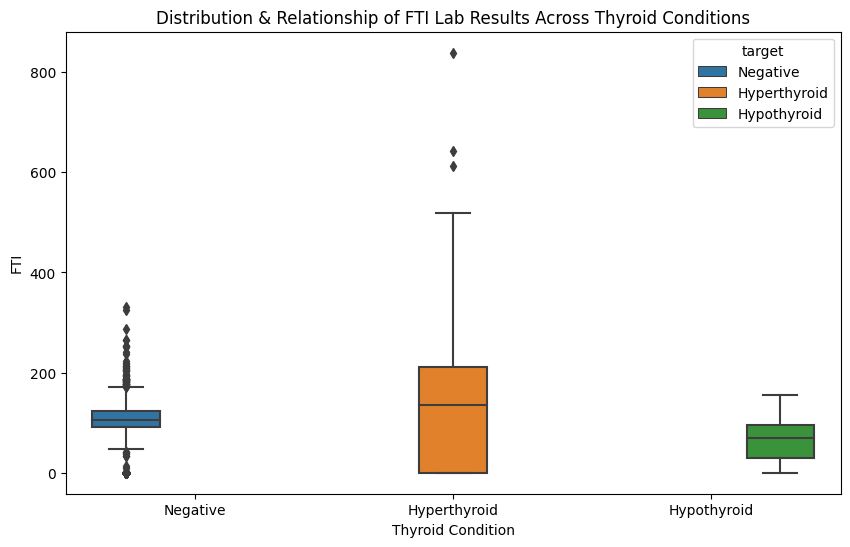

In [88]:
# Generating customized Box Plot between 'target' and 'FTI' column
plt.figure(figsize = (10,6))
sns.boxplot(df1, x='target', y='FTI', hue = 'target', )
plt.title('Distribution & Relationship of FTI Lab Results Across Thyroid Conditions')
plt.xlabel('Thyroid Condition')
plt.ylabel('FTI')
plt.show()

**Inferences and Insights** <br>

**1. Diagnostic Complexity at Lower FTI Levels:** <br>
* The overlap in FTI levels below 180 among all three classes highlights the diagnostic challenges in early-stage or borderline cases.
* These cases emphasize the importance of combining FTI with other diagnostic inputs, such as reaults from other lab tests, to improve specificity and reduce the risk of misclassification.
<br>

**2. Implications of Outliers:** <br>
* Outliers in the "Negative" and "Hyperthyroid" classes underline the need for caution when interpreting FTI values. These outliers could represent exceptional cases, potential misdiagnoses, or instances where other abnormal lab results influence the overall profile.
* This highlights the necessity of adopting a holistic diagnostic approach that considers all clinical and laboratory findings to ensure accuracy.
<br>

**3. FTI as a Diagnostic Marker for Hyperthyroidism:**
* FTI levels above 200 serve as a useful threshold for suspecting hyperthyroidism, but clinical judgment should factor in other complementary tests to confirm the diagnosis.
* Extremely high FTI levels (above 350) provide strong evidence of hyperthyroidism, aiding in confidently identifying severe cases.

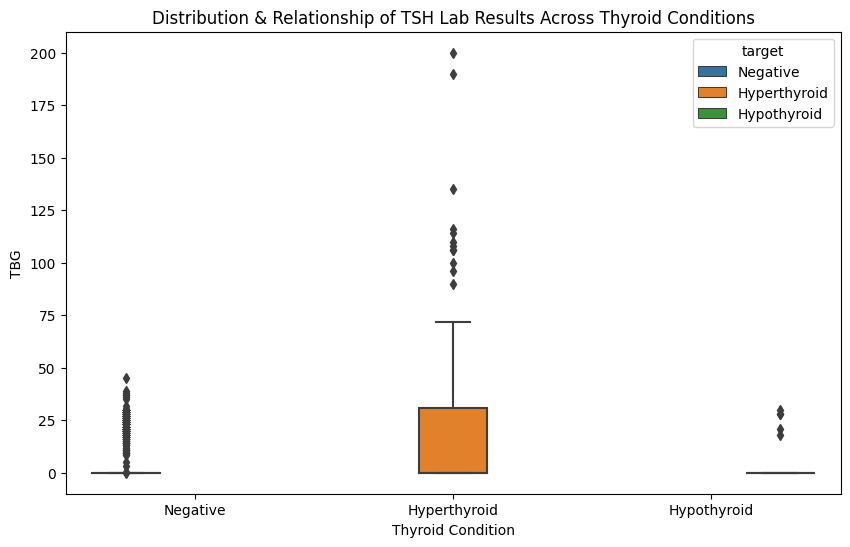

In [89]:
# Generating customized Box Plot between 'target' and 'TBG' column
plt.figure(figsize = (10,6))
sns.boxplot(df1, x='target', y='TBG', hue = 'target', )
plt.title('Distribution & Relationship of TSH Lab Results Across Thyroid Conditions')
plt.xlabel('Thyroid Condition')
plt.ylabel('TBG')
plt.show()

**Insights** <br>

**1. Diagnostic Value of TBG Levels:**
* TTBG levels show a strong positive correlation with hyperthyroidism. Higher TBG levels are frequently associated with hyperthyroid cases.
* The distribution of TBG values indicates that the lower fence, Q1, and median are at 0, while Q3 and the upper fence are at 31 and 72, respectively. The presence of a 0 mark for many entries arises from the imputation of null values when TBG tests were not performed.
* Notably, most outliers above the upper fence are associated with "Hyperthyroid" cases, with very few outliers observed in "Hypothyroid" and "Negative" classes. This pattern underscores the primary association of TBG lab tests with hyperthyroidism.
<br>

**2. Outliers in TBG Levels Across Classes::** <br>
* Outliers are observed in the "Negative" and "Hyperthyroid" classes. These may represent exceptional cases, such as individuals with other contributing medical conditions, potential testing anomalies, or rare presentations of thyroid function.
* The presence of outliers may also reflect the influence of other lab results or clinical factors that interact with TBG levels.
Such cases warrant further exploration. 
<br>

**3. TBG Values at 0 mark:** <br>
* TBG levels at the 0 mark (imputed values for null entries) are commonly observed in "Negative" and "Hypothyroid" cases.
* This suggests that TBG testing may have limited utility in diagnosing hypothyroidism or identifying individuals without thyroid dysfunction. These findings imply that TBG levels are primarily relevant for hyperthyroid cases and contribute less diagnostic value for other conditions.

In [90]:
df1['referral_source'].unique()

array(['other', 'SVI', 'SVHC', 'STMW', 'SVHD', 'WEST'], dtype=object)

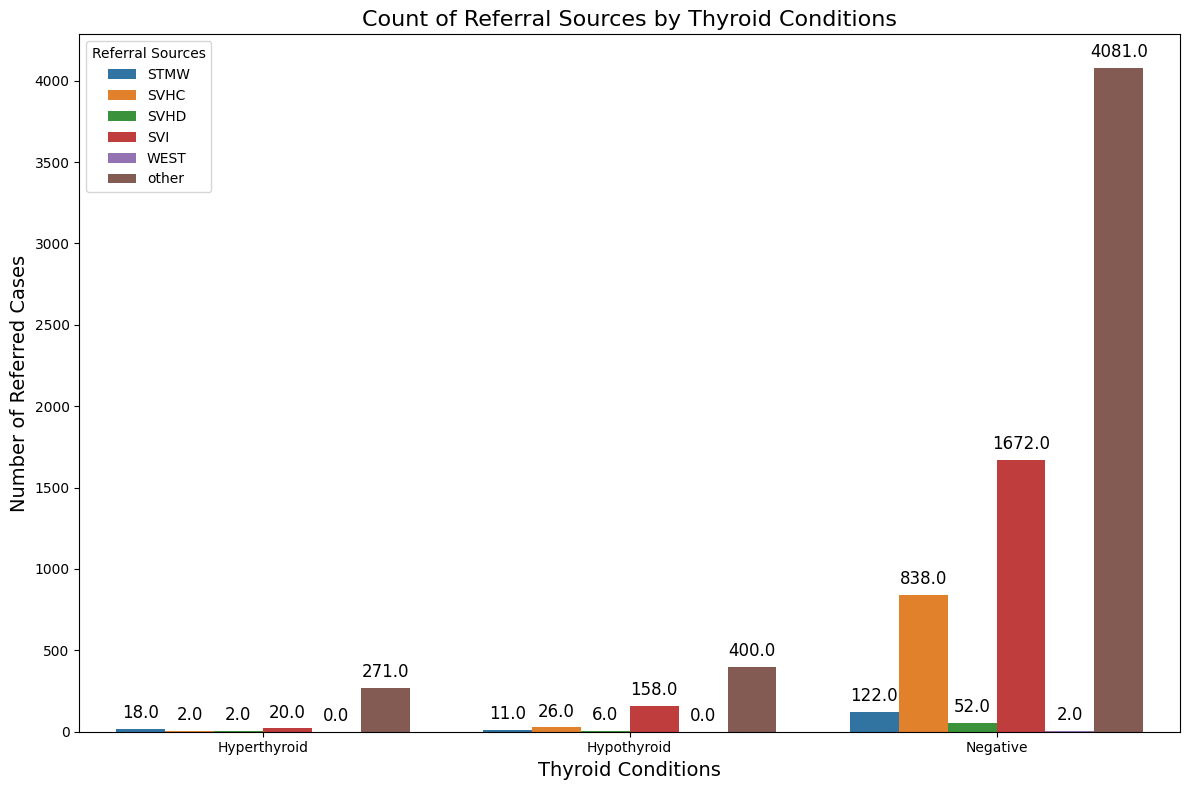

In [91]:
# Creating dataframe by grouping 'target' and 'referral_source' along with counts of referral sources by target
count_data = df1.groupby(['target', 'referral_source']).size().unstack(fill_value=0)
count_data = count_data.reset_index()

# Melt the data
count_melted = count_data.melt(id_vars='target', var_name='referral_source', value_name='Count')

#Create bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=count_melted, x='target', y='Count', hue='referral_source')

# Annotate bars with count values
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', 
                 fontsize=12, color='black', 
                 rotation=0, 
                 xytext=(0, 5), textcoords='offset points')

# Set labels & titles, adjust and display the plot
plt.title('Count of Referral Sources by Thyroid Conditions', fontsize=16)
plt.xlabel('Thyroid Conditions', fontsize=14)
plt.ylabel('Number of Referred Cases', fontsize=14)
plt.legend(title='Referral Sources')
plt.tight_layout()
plt.show()

**Insights** <br>

**1. Dominance of 'Other' Referral Source Across All Classes:** <br>
The 'Other' referral source is the largest contributor to patient referrals across all target classes. This indicates that a significant portion of referrals originates from sources outside the main listed categories, such as private clinics, independent practitioners, or unclassified healthcare facilities.
<br>

**2. Role of Referral Sources in Hyperthyroid Cases:** <br>
The relatively small number of cases referred by 'SVI' and 'STMW' suggests these facilities might specialize in detecting or managing hyperthyroidism to a limited extent compared to broader facilities under 'Other'.

**3. Role of Referral Sources in Hypothyroid Cases:** <br>
After 'Others', 'SVI' contributes significantly followed by 'SVHC'. This indicates that SVI may play an important role in diagnosing or managing hypothyroid cases, suggesting a potential specialization in hypothyroid detection.

**4. Role of Referral Sources in Negative Cases:** <br>
After 'Others', 'SVI' and 'SVHC' has major contributions. This suggests that SVHC and SVI are prominent sources for routine thyroid evaluations or cases suspected of thyroid dysfunction but ultimately ruled negative.

**5. Key Referral Facilities:** <br>
The significant contributions of SVI and SVHC to "Hypothyroid" and "Negative" cases suggest these facilities may have established protocols or specialized expertise in thyroid evaluations. Strengthening their diagnostic capacities could further enhance early detection and management of thyroid conditions.

**6. Negligible Contributions from 'West':** <br>
The 'West' referral source contributes minimally across all classes. This could reflect the limited scope, capacity, or geographical reach of facilities categorized under 'West'.

**7. Minor Referral Sources:** <br>
Both STMW and SVHD have low contributions to all classes. This suggests that these facilities may cater to smaller patient populations or have limited specialization in thyroid-related diagnostics.

In [92]:
df1['pregnant']=df1['pregnant'].map(bool_map)
df1['pregnant'].unique()

array(['False', 'True'], dtype=object)

In [93]:
# Creating dataframe containing the records for only female patients
female_df = df1[df1['sex']=='Female']
female_df.shape

(5280, 23)

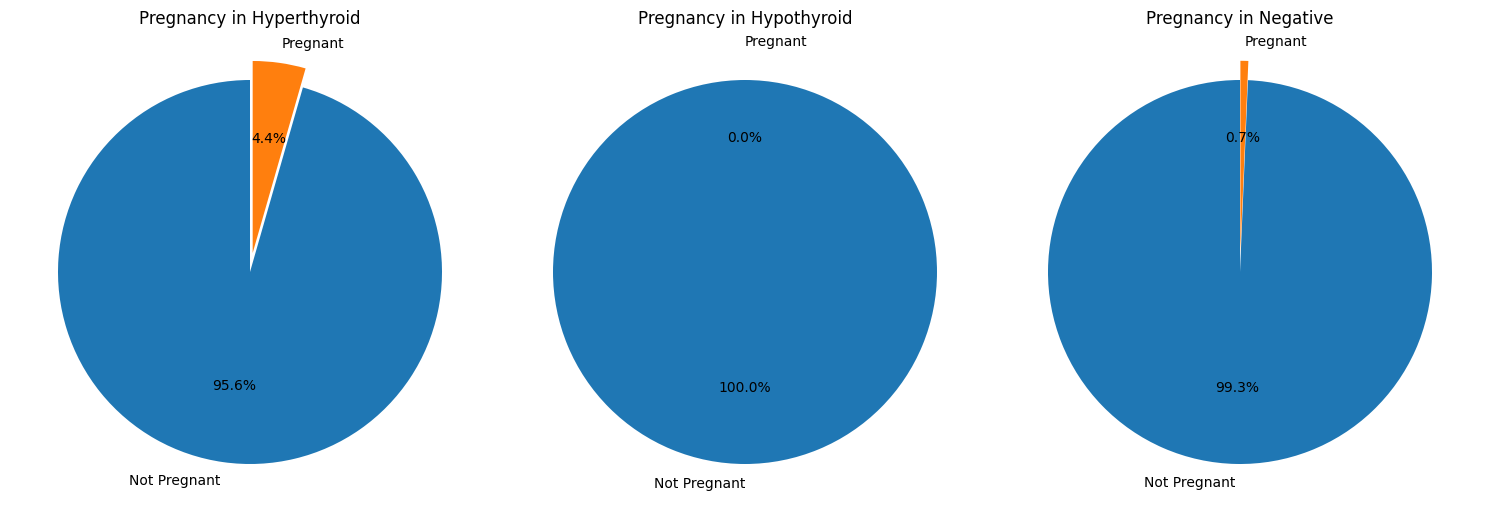

In [94]:
# Creating dataframe by grouping 'target' and 'pregnant' columns of 'female_df' dataframe
# along with the count of target classes by pregnant and not-pregnant females
count_preg = female_df.groupby(['target', 'pregnant']).size().unstack(fill_value=0)
count_preg = count_preg.reset_index()

# Creating a list containing 'target' classes
target_sorted =  sorted(df1['target'].unique())

#Generating Pie Charts
fig,axes = plt.subplots(1, len(count_preg['target']), figsize = (15,10))

#Annoting the labels
for i, target in enumerate(count_preg.index):
    data = count_preg.loc[i, ['False', 'True']]
    axes[i].pie(data, labels = ['Not Pregnant', 'Pregnant'], autopct = '%1.1f%%',
                 startangle=90, explode = [0, 0.1])
    axes[i].set_title(f"Pregnancy in {target_sorted[i]}")

#Adjust layout and display the plots
plt.tight_layout()
plt.show()

**Insights**

1. The Hyperthyroid and Hypothyroid groups show significantly lower pregnancy rates, with hypothyroidism showing no pregnancies at all, indicating possible issues with fertility or pregnancy complications. This aligns with the clinical obeservations that thyroid disorders, especially hypothyroidism, can influence fertility and pregnancy outcomes.

2. People free of thyroid disease (i.e., having normal thyroid function) is generally associated with a higher rate of pregnancy or fertility, which aligns with the general expectation but the number of pregenancy is quite low in this case too.


3. This suggests that pregnancy status might not be a major confounding factor in the dataset but remains clinically important for specific subgroups, such as hyperthyroid and hypothyroid patients.

# Data Split

In [95]:
# Splits the DataFrame into features (x) and target variable (y)
x = df.drop('target', axis = 1)
y = df['target']

In [96]:
# Splitting the data into training and testing sets, maintaining the original class distribution
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [97]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6144, 22)
(1537, 22)
(6144,)
(1537,)


# UDF to plot AU-PRC Curve

In [98]:
# Creating a function 'au_prc' to plot AU-PRC curve along with Average Precision for each class
def au_prc(y_test_data, y_score_data):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    from sklearn.preprocessing import label_binarize
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Binarize the labels for multi-class OvR
    classes = np.unique(y_test_data)
    y_true_binarized = label_binarize(y_test_data, classes=classes)
    
    # Store precision-recall metrics for each class
    precision_dict = {}
    recall_dict = {}
    average_precision_dict = {}
    
    for i, class_label in enumerate(classes):
        precision_dict[class_label], recall_dict[class_label], _ = precision_recall_curve(
            y_true_binarized[:, i], y_score_data[:, i]
        )
        average_precision_dict[class_label] = average_precision_score(
            y_true_binarized[:, i], y_score_data[:, i]
        )
    
    # Compute micro-average PR curve
    precision_micro, recall_micro, _ = precision_recall_curve(
        y_true_binarized.ravel(), y_score_data.ravel()
    )
    average_precision_micro = average_precision_score(y_true_binarized, y_score_data, average="micro")
    
    # Plot Precision-Recall Curve
    plt.figure(figsize=(8, 6))
    for class_label in classes:
        plt.plot(
            recall_dict[class_label], 
            precision_dict[class_label], 
            label=f"Class {class_label} (AP = {average_precision_dict[class_label]:.2f})"
        )
    
    # Add micro-average curve
    plt.plot(
        recall_micro, 
        precision_micro, 
        label=f"Micro-Average (AP = {average_precision_micro:.2f})", 
        color='gold', linestyle='--'
    )
    
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve for Multi-Class Classification")
    plt.legend(loc="best")
    plt.grid()
    plt.show()


# Data Modelling

## Logistic Regression


 [[  30    4   29]
 [   0   67   53]
 [   6    2 1346]]

Accuracy: 0.9388418998048146

Class Hyperthyroid: Average Precision = 0.644054212571716
Class Hypothyroid: Average Precision = 0.8985679934493692
Class Negative: Average Precision = 0.9964043216553989
Micro-average Precision Score: 0.9738209153116261


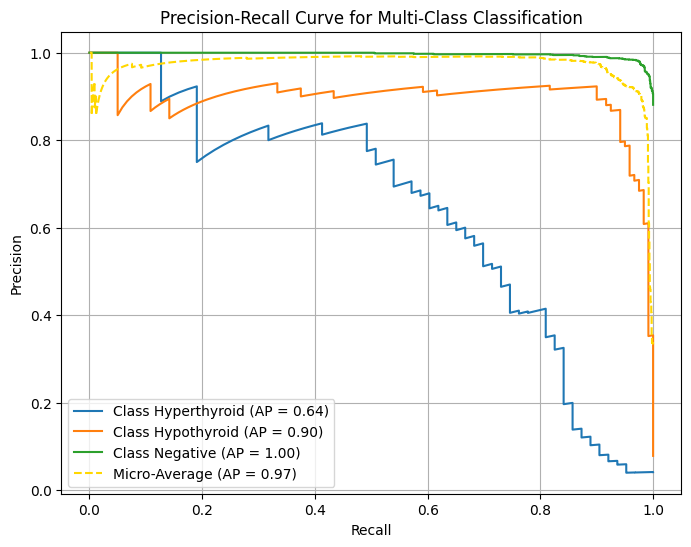

In [99]:
from sklearn.linear_model import LogisticRegression

#List of columns with continuous values and the copies of x_train and x_test
col_to_encode = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
x_train_lr = x_train.copy()
x_test_lr = x_test.copy()

#Creating object for the class Standard Scaler
sc = StandardScaler()

# Transform the values of columns in 'col_to_encode' for both training and test features
x_train_lr[col_to_encode] = sc.fit_transform(x_train_lr[col_to_encode])
x_test_lr[col_to_encode] = sc.transform(x_test_lr[col_to_encode])

# Training Logistic Regression
lr = LogisticRegression()
lr.fit(x_train_lr, y_train)

# Making Predictions
y_pred = lr.predict(x_test_lr)
y_score = lr.predict_proba(x_test_lr)

# Binarize the target for multiclass precision
y_test_binarized = label_binarize(y_test, classes=lr.classes_)

#Evaluate
print(f'\n {confusion_matrix(y_test, y_pred)}\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
# Compute Average Precision Score for each class
average_precisions = []
for i, class_label in enumerate(lr.classes_):
    avg_precision = average_precision_score(y_test_binarized[:, i], y_score[:, i])
    average_precisions.append(avg_precision)
    print(f'Class {class_label}: Average Precision = {avg_precision}')
# Micro Average Precision (unweighted mean)
print(f"Micro-average Precision Score: {average_precision_score(y_test_binarized, y_score, average='micro')}")
au_prc(y_test_data= y_test, y_score_data= y_score)

## Random Forest Classifier


 [[  48    4   11]
 [   0  118    2]
 [   6    3 1345]]

Accuracy: 0.9830839297332465

Class Hyperthyroid: Average Precision = 0.9419796258701516
Class Hypothyroid: Average Precision = 0.9959730460656399
Class Negative: Average Precision = 0.9997783749578298
Micro-average Precision Score: 0.9990786069433006


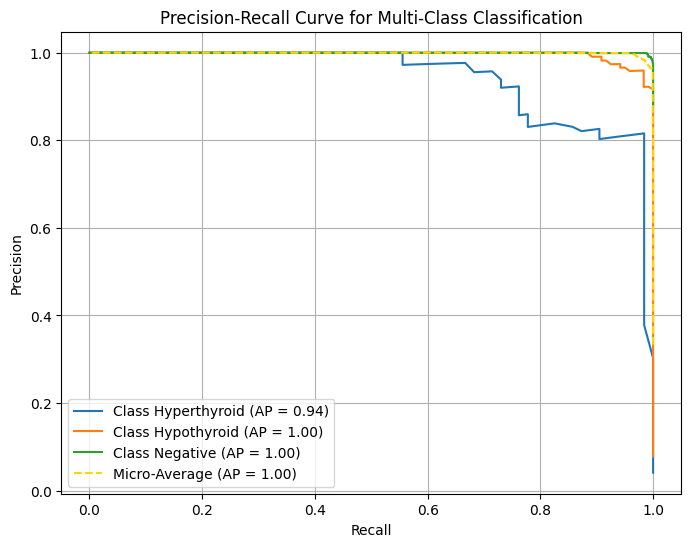

In [100]:
from sklearn.ensemble import RandomForestClassifier

# Training Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

# Making Predictions
y_pred = rf.predict(x_test)
y_score = rf.predict_proba(x_test)

# Binarize the target for multiclass precision
y_test_binarized = label_binarize(y_test, classes=lr.classes_)

#Evaluate
print(f'\n {confusion_matrix(y_test, y_pred)}\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
# Compute Average Precision Score for each class
average_precisions = []
for i, class_label in enumerate(lr.classes_):
    avg_precision = average_precision_score(y_test_binarized[:, i], y_score[:, i])
    average_precisions.append(avg_precision)
    print(f'Class {class_label}: Average Precision = {avg_precision}')
# Micro Average Precision (unweighted mean)
print(f"Micro-average Precision Score: {average_precision_score(y_test_binarized, y_score, average='micro')}")
au_prc(y_test_data= y_test, y_score_data= y_score)


 [[  47    3   13]
 [   0  116    4]
 [   3    2 1349]]

Accuracy: 0.9837345478204295

Class Hyperthyroid: Average Precision = 0.950293171146827
Class Hypothyroid: Average Precision = 0.9893471136830815
Class Negative: Average Precision = 0.9998723379455445
Micro-average Precision Score: 0.9990854867969383


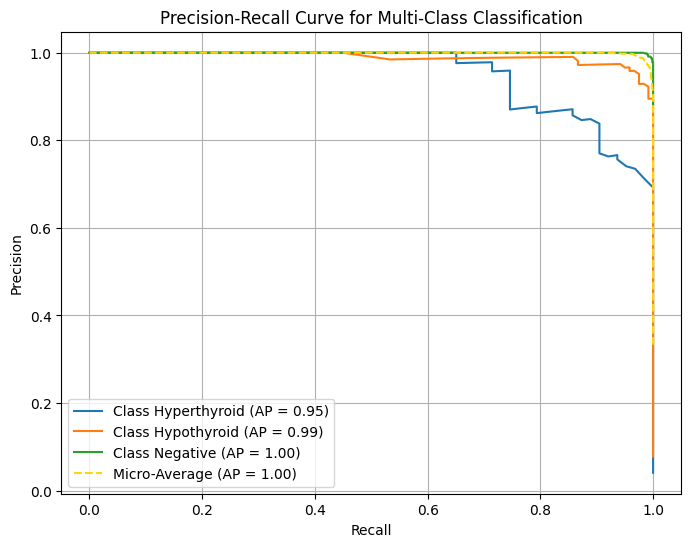

In [101]:
# Training Random Forest Clssifier with customized Class Weights
rf2 = RandomForestClassifier(random_state=42, class_weight={'Hyperthyroid':1500, 'Hypothyroid':100, 'Negative':25})
rf2.fit(x_train, y_train)

# Making Predictions
y_pred = rf2.predict(x_test)
y_score = rf2.predict_proba(x_test)

# Binarize the target for multiclass precision
y_test_binarized = label_binarize(y_test, classes=lr.classes_)

#Evaluate
print(f'\n {confusion_matrix(y_test, y_pred)}\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
# Compute Average Precision Score for each class
average_precisions = []
for i, class_label in enumerate(lr.classes_):
    avg_precision = average_precision_score(y_test_binarized[:, i], y_score[:, i])
    average_precisions.append(avg_precision)
    print(f'Class {class_label}: Average Precision = {avg_precision}')
# Micro Average Precision (unweighted mean)
print(f"Micro-average Precision Score: {average_precision_score(y_test_binarized, y_score, average='micro')}")
au_prc(y_test_data= y_test, y_score_data= y_score)

## Extra Tree Classifier


 [[  45    3   15]
 [   0   96   24]
 [   5    2 1347]]

Accuracy: 0.9681197137280416

Class Hyperthyroid: Average Precision = 0.922473866543445
Class Hypothyroid: Average Precision = 0.9646060381879377
Class Negative: Average Precision = 0.9993586236245877
Micro-average Precision Score: 0.9967944074086664


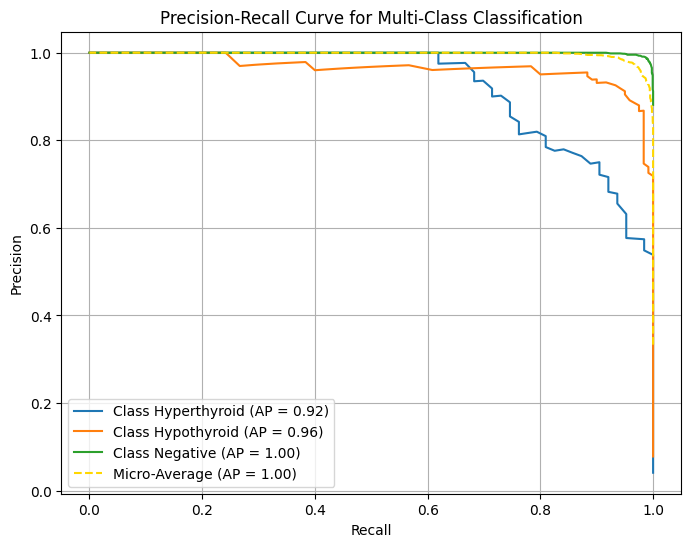

In [102]:
from sklearn.ensemble import ExtraTreesClassifier

#Training the Extra Tree Classifier
etc = ExtraTreesClassifier(random_state=42)
etc.fit(x_train, y_train)

# Making Predictions
y_pred = etc.predict(x_test)
y_score = etc.predict_proba(x_test)

# Binarize the target for multiclass precision
y_test_binarized = label_binarize(y_test, classes=lr.classes_)

#Evaluate
print(f'\n {confusion_matrix(y_test, y_pred)}\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
# Compute Average Precision Score for each class
average_precisions = []
for i, class_label in enumerate(lr.classes_):
    avg_precision = average_precision_score(y_test_binarized[:, i], y_score[:, i])
    average_precisions.append(avg_precision)
    print(f'Class {class_label}: Average Precision = {avg_precision}')
# Micro Average Precision (unweighted mean)
print(f"Micro-average Precision Score: {average_precision_score(y_test_binarized, y_score, average='micro')}")
au_prc(y_test_data= y_test, y_score_data= y_score)

## CatBoost Classifier


 [[  52    1   10]
 [   2  115    3]
 [   7    2 1345]]

Accuracy: 0.9837345478204295

Class Hyperthyroid: Average Precision = 0.9593282121005894
Class Hypothyroid: Average Precision = 0.9966490229667158
Class Negative: Average Precision = 0.9998726111689077
Micro-average Precision Score: 0.9994234526694553


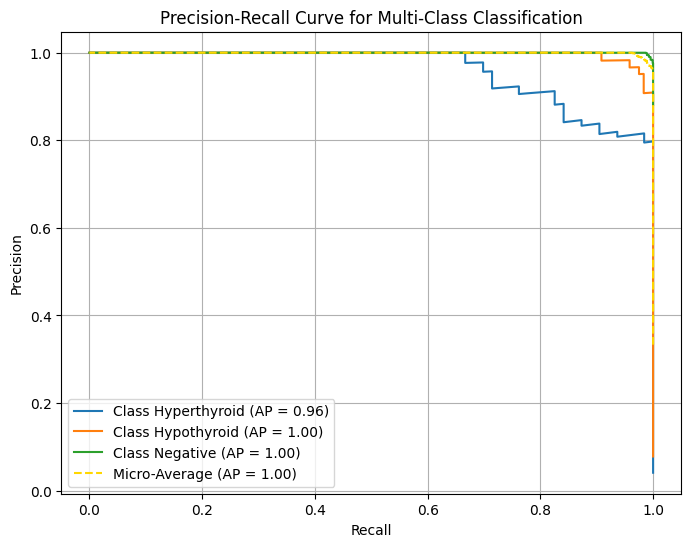

In [103]:
from catboost import CatBoostClassifier

# Training the CatBoost Classifier with Customized Class Weights
cat = CatBoostClassifier(class_weights=[20, 5, 10], random_state=42, verbose = False)
cat.fit(x_train, y_train)

# Making Predictions
y_pred = cat.predict(x_test)
y_score = cat.predict_proba(x_test)

# Binarize the target for multiclass precision
y_test_binarized = label_binarize(y_test, classes=lr.classes_)

#Evaluate
print(f'\n {confusion_matrix(y_test, y_pred)}\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
# Compute Average Precision Score for each class
average_precisions = []
for i, class_label in enumerate(lr.classes_):
    avg_precision = average_precision_score(y_test_binarized[:, i], y_score[:, i])
    average_precisions.append(avg_precision)
    print(f'Class {class_label}: Average Precision = {avg_precision}')
# Micro Average Precision (unweighted mean)
print(f"Micro-average Precision Score: {average_precision_score(y_test_binarized, y_score, average='micro')}")
au_prc(y_test_data= y_test, y_score_data= y_score)


 [[  56    2    5]
 [   2  116    2]
 [   7    3 1344]]

Accuracy: 0.9863370201691607

Class Hyperthyroid: Average Precision = 0.9635574096040294
Class Hypothyroid: Average Precision = 0.9974427716921468
Class Negative: Average Precision = 0.9998853534776999
Micro-average Precision Score: 0.999365362803668


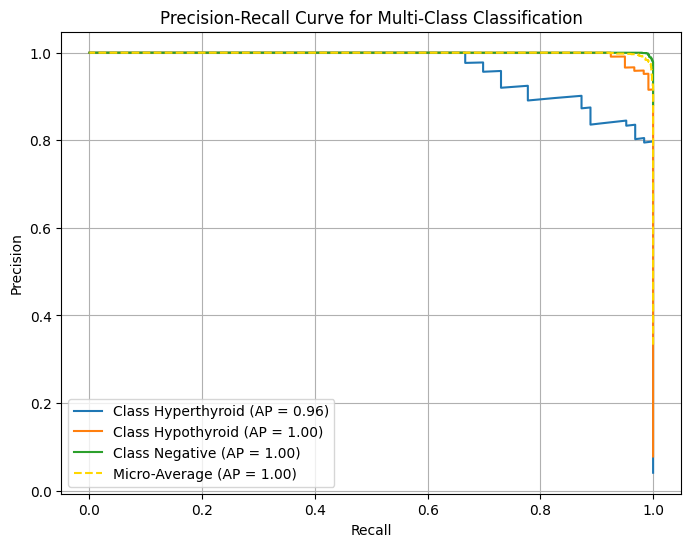

In [104]:
# Training the CatBoost Classifier with Balanced Class Weights
cat2 = CatBoostClassifier(auto_class_weights='Balanced', random_state=42, verbose = False)
cat2.fit(x_train, y_train)

# Making Predictions
y_pred = cat2.predict(x_test)
y_score = cat2.predict_proba(x_test)

# Binarize the target for multiclass precision
y_test_binarized = label_binarize(y_test, classes=lr.classes_)

#Evaluate
print(f'\n {confusion_matrix(y_test, y_pred)}\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
# Compute Average Precision Score for each class
average_precisions = []
for i, class_label in enumerate(lr.classes_):
    avg_precision = average_precision_score(y_test_binarized[:, i], y_score[:, i])
    average_precisions.append(avg_precision)
    print(f'Class {class_label}: Average Precision = {avg_precision}')
# Micro Average Precision (unweighted mean)
print(f"Micro-average Precision Score: {average_precision_score(y_test_binarized, y_score, average='micro')}")
au_prc(y_test_data= y_test, y_score_data= y_score)


 [[  57    1    5]
 [   0  117    3]
 [   8    3 1343]]

Accuracy: 0.9869876382563435

Class Hyperthyroid: Average Precision = 0.9663956566476632
Class Hypothyroid: Average Precision = 0.9975850733180889
Class Negative: Average Precision = 0.9998819933646532
Micro-average Precision Score: 0.9992399062388099


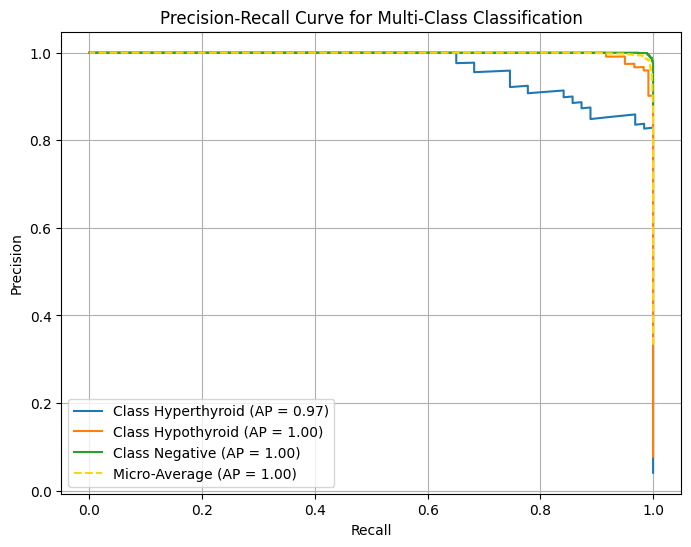

In [105]:
# Training the CatBoost Classifier with Balanced Class Weights and L2 Regularization
cat3 = CatBoostClassifier(auto_class_weights='Balanced', random_state=42, verbose = False, l2_leaf_reg=1)
cat3.fit(x_train, y_train)

# Making Predictions
y_pred = cat3.predict(x_test)
y_score = cat3.predict_proba(x_test)

# Binarize the target for multiclass precision
y_test_binarized = label_binarize(y_test, classes=lr.classes_)

#Evaluate
print(f'\n {confusion_matrix(y_test, y_pred)}\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
# Compute Average Precision Score for each class
average_precisions = []
for i, class_label in enumerate(lr.classes_):
    avg_precision = average_precision_score(y_test_binarized[:, i], y_score[:, i])
    average_precisions.append(avg_precision)
    print(f'Class {class_label}: Average Precision = {avg_precision}')
# Micro Average Precision (unweighted mean)
print(f"Micro-average Precision Score: {average_precision_score(y_test_binarized, y_score, average='micro')}")
au_prc(y_test_data= y_test, y_score_data= y_score)

## Gradient Boosting Classifier


 [[  61    1    1]
 [   3  114    3]
 [  17    3 1334]]

Accuracy: 0.9817826935588809

Class Hyperthyroid: Average Precision = 0.9108315924846276
Class Hypothyroid: Average Precision = 0.9945836148782023
Class Negative: Average Precision = 0.9996821180109402
Micro-average Precision Score: 0.9965336878953206


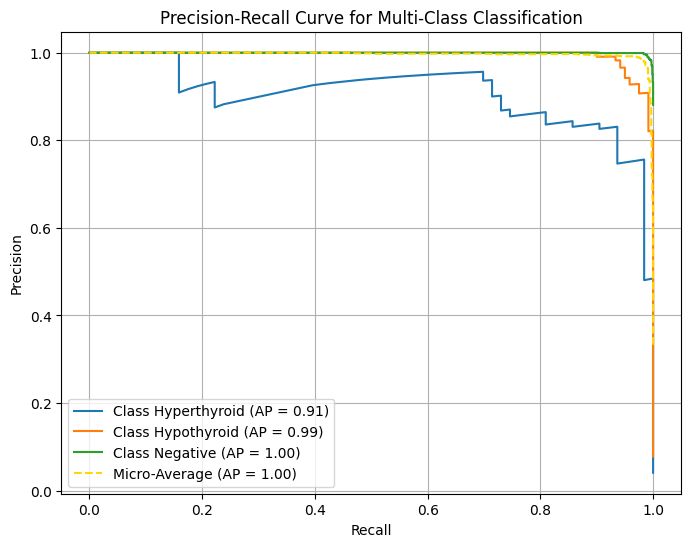

In [106]:
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.ensemble import GradientBoostingClassifier

# Compute sample weights to balance the classes
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Train the GradientBoostingClassifier with the sample weights
gb = GradientBoostingClassifier(random_state=10)
gb.fit(x_train, y_train, sample_weight=sample_weights)

# Making Predictions
y_pred = gb.predict(x_test)
y_score = gb.predict_proba(x_test)

# Binarize the target for multiclass precision
y_test_binarized = label_binarize(y_test, classes=lr.classes_)

#Evaluate
print(f'\n {confusion_matrix(y_test, y_pred)}\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
# Compute Average Precision Score for each class
average_precisions = []
for i, class_label in enumerate(lr.classes_):
    avg_precision = average_precision_score(y_test_binarized[:, i], y_score[:, i])
    average_precisions.append(avg_precision)
    print(f'Class {class_label}: Average Precision = {avg_precision}')
# Micro Average Precision (unweighted mean)
print(f"Micro-average Precision Score: {average_precision_score(y_test_binarized, y_score, average='micro')}")
au_prc(y_test_data= y_test, y_score_data= y_score)

## XGBoost Classifier


 [[  51    4    8]
 [   0  117    3]
 [   7    1 1346]]

Accuracy: 0.9850357839947951

Class Hyperthyroid: Average Precision = 0.9442347886315356
Class Hypothyroid: Average Precision = 0.9957812963624391
Class Negative: Average Precision = 0.9998498089332652
Micro-average Precision Score: 0.9992077192463985


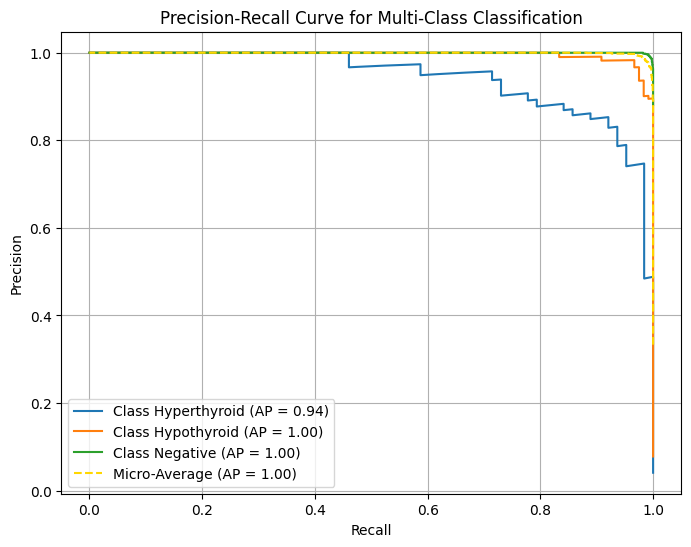

In [107]:
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBClassifier

# Mapping the Encoded Target values to Different Classes of Thyroid Conditions
target_map = {'Hyperthyroid':0, 'Hypothyroid':1, 'Negative':2}
y_train_encoded = y_train.map(target_map)
y_test_encoded = y_test.map(target_map)

# Compute sample weights to balance the classes
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_encoded)

# Train the XGBoostingClassifier with the sample weights
xgb = XGBClassifier(random_state=10)
xgb.fit(x_train, y_train_encoded, sample_weight=sample_weights)

# Making Predictions
y_pred = xgb.predict(x_test)
y_score = xgb.predict_proba(x_test)

# Binarize the target for multiclass precision
y_test_binarized = label_binarize(y_test, classes=lr.classes_)

#Evaluate
print(f'\n {confusion_matrix(y_test_encoded, y_pred)}\n')
print(f'Accuracy: {accuracy_score(y_test_encoded, y_pred)}\n')
# Compute Average Precision Score for each class
average_precisions = []
for i, class_label in enumerate(lr.classes_):
    avg_precision = average_precision_score(y_test_binarized[:, i], y_score[:, i])
    average_precisions.append(avg_precision)
    print(f'Class {class_label}: Average Precision = {avg_precision}')
print(f"Micro-average Precision Score: {average_precision_score(y_test_binarized, y_score, average='micro')}")
au_prc(y_test_data= y_test, y_score_data= y_score)

## CatBoost with Under-sampling

Resampled class distribution: Counter({'Hyperthyroid': 250, 'Hypothyroid': 250, 'Negative': 250})

 [[  63    0    0]
 [   3  115    2]
 [  31    8 1315]]

Accuracy: 0.9713728041639558

Class Hyperthyroid: Average Precision = 0.8963919834040961
Class Hypothyroid: Average Precision = 0.9805885808824153
Class Negative: Average Precision = 0.9995276860921435
Micro-average Precision Score: 0.9919506351870929


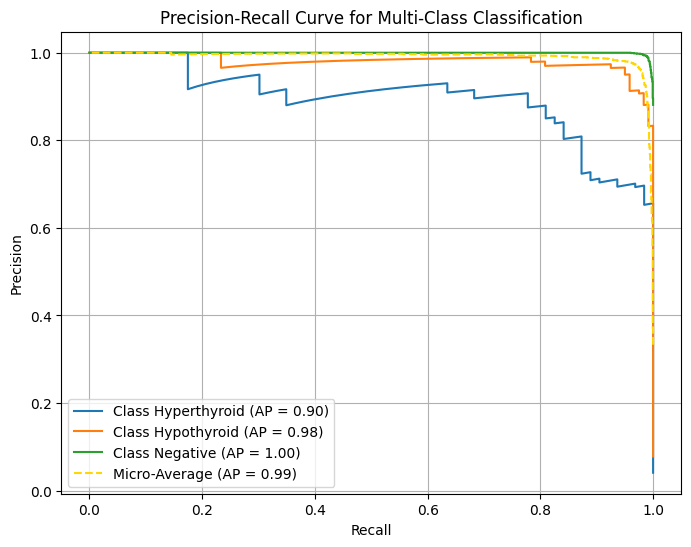

In [108]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Apply undersampling
rus = RandomUnderSampler(random_state=42)
x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)

# Class distribution after resampling
print("Resampled class distribution:", Counter(y_train_resampled))

#Training the model
cat = CatBoostClassifier(auto_class_weights='Balanced', random_state=42, verbose = False, use_best_model=True)
cat.fit(x_train_resampled, y_train_resampled, eval_set=(x_test, y_test))

# Making Predictions
y_pred = cat.predict(x_test)
y_score = cat.predict_proba(x_test)

# Binarize the target for multiclass precision
y_test_binarized = label_binarize(y_test, classes=lr.classes_)

#Evaluate
print(f'\n {confusion_matrix(y_test, y_pred)}\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
# Compute Average Precision Score for each class
average_precisions = []
for i, class_label in enumerate(lr.classes_):
    avg_precision = average_precision_score(y_test_binarized[:, i], y_score[:, i])
    average_precisions.append(avg_precision)
    print(f'Class {class_label}: Average Precision = {avg_precision}')
# Micro Average Precision (unweighted mean)
print(f"Micro-average Precision Score: {average_precision_score(y_test_binarized, y_score, average='micro')}")
au_prc(y_test_data= y_test, y_score_data= y_score)

## CatBoost & Gradient Boosting Classifier with Oversampling

Original class distribution: Counter({'Negative': 5413, 'Hypothyroid': 481, 'Hyperthyroid': 250})
Resampled class distribution: Counter({'Negative': 5413, 'Hypothyroid': 5413, 'Hyperthyroid': 5413})

 [[  55    4    4]
 [   3  116    1]
 [  13    3 1338]]

Accuracy: 0.9817826935588809

Class Hyperthyroid: Average Precision = 0.9304680470954472
Class Hypothyroid: Average Precision = 0.9937725145177542
Class Negative: Average Precision = 0.9998288498639487
Micro-average Precision Score: 0.9987581560213015


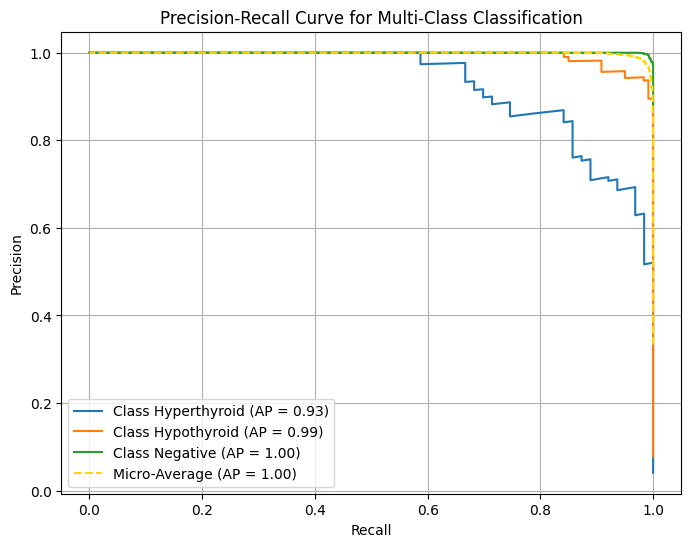

In [109]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Before resampling
print("Original class distribution:", Counter(y_train))

# Apply SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# After resampling
print("Resampled class distribution:", Counter(y_train_resampled))
cat_os = CatBoostClassifier(auto_class_weights='Balanced', random_state=42, verbose = False, use_best_model=True)
cat_os.fit(x_train_resampled, y_train_resampled, eval_set=(x_test, y_test))

# Making Predictions
y_pred = cat_os.predict(x_test)
y_score = cat_os.predict_proba(x_test)

# Binarize the target for multiclass precision
y_test_binarized = label_binarize(y_test, classes=lr.classes_)

#Evaluate
print(f'\n {confusion_matrix(y_test, y_pred)}\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
# Compute Average Precision Score for each class
average_precisions = []
for i, class_label in enumerate(lr.classes_):
    avg_precision = average_precision_score(y_test_binarized[:, i], y_score[:, i])
    average_precisions.append(avg_precision)
    print(f'Class {class_label}: Average Precision = {avg_precision}')
# Micro Average Precision (unweighted mean)
print(f"Micro-average Precision Score: {average_precision_score(y_test_binarized, y_score, average='micro')}")
au_prc(y_test_data= y_test, y_score_data= y_score)


 [[  57    2    4]
 [   0  117    3]
 [  19    3 1332]]

Accuracy: 0.9798308392973325

Class Hyperthyroid: Average Precision = 0.9083449483286202
Class Hypothyroid: Average Precision = 0.9948319725552768
Class Negative: Average Precision = 0.9995501924478686
Micro-average Precision Score: 0.9955406161855962


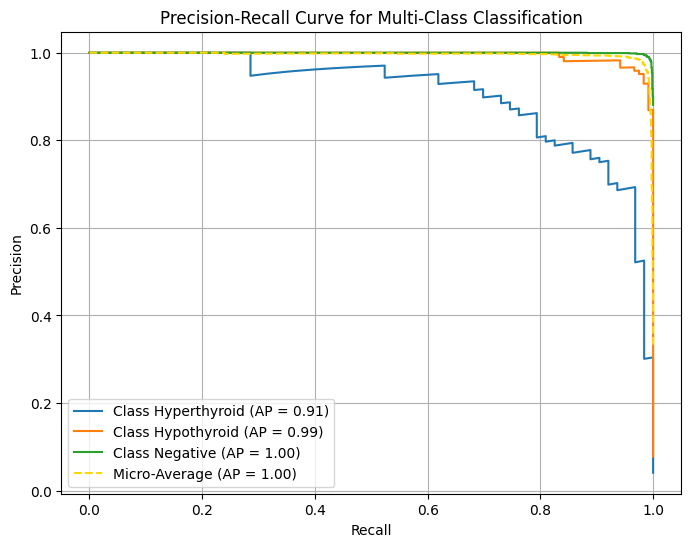

In [110]:
# Training the GradientBoostingClassifier model with the oversampled weights
gb_os = GradientBoostingClassifier(random_state=10)
gb_os.fit(x_train_resampled, y_train_resampled)

# Making Predictions
y_pred = gb_os.predict(x_test)
y_score = gb_os.predict_proba(x_test)

# Binarize the target for multiclass precision
y_test_binarized = label_binarize(y_test, classes=lr.classes_)

#Evaluate
print(f'\n {confusion_matrix(y_test, y_pred)}\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
# Compute Average Precision Score for each class
average_precisions = []
for i, class_label in enumerate(lr.classes_):
    avg_precision = average_precision_score(y_test_binarized[:, i], y_score[:, i])
    average_precisions.append(avg_precision)
    print(f'Class {class_label}: Average Precision = {avg_precision}')
# Micro Average Precision (unweighted mean)
print(f"Micro-average Precision Score: {average_precision_score(y_test_binarized, y_score, average='micro')}")
au_prc(y_test_data= y_test, y_score_data= y_score)

--------------------------------------------------------------------------------------------------
# Final Model

In <a href="#CatBoost-Classifier">CatBoost Classifier</a>, I have created three Catboost Classifier model. The key metrics across these 3 models are following:
| Version | Accuracy | Average Precision (Micro) | Confusion Matrix Details | AU-PRC Highlights |
|---|---|---|---|---|
| 1 | 0.9837 | 0.9853 | - Hyperthyroid: Slightly fewer true positives (52) and more false positives (10) for the "Negative" class. <br>- Hypothyroid: Good balance. <br>- Negative: Excellent accuracy (1345). | AP for Hyperthyroid: 0.96 |
| 2 | 0.9863 | 0.9869 | - Hyperthyroid: Improved true positives (56) and reduced false positives. <br>- Hypothyroid: Balanced. <br>- Negative: Slightly more misclassifications for other classes. | AP for Hyperthyroid: 0.96 |
| 3 | 0.9870 | 0.9879 | - Hyperthyroid: Highest true positives (57). <br>- Hypothyroid: Best balance. <br>- Negative: Slightly higher true positives (1343). | AP for Hyperthyroid: 0.97 |

**Observations:**

**Version 1:**
- Uses manual class_weights, which provides acceptable accuracy and AU-PRC but slightly underperforms compared to the other models.
- Slightly more false positives for Hyperthyroid and fewer true positives compared to Versions 2 and 3.
- It doesn't capture the slight imbalance in the dataset as efficiently as the other two versions.


**Version 2:**
- Employs auto_class_weights="Balanced", leading to improved handling of class imbalance.
- Achieves better accuracy and average precision than Version 1.
- However, it still slightly underperforms in AU-PRC for Hyperthyroid compared to Version 3.


**Version 3:**
- Combines auto_class_weights="Balanced" with l2_leaf_reg=1 for additional regularization.
- Achieves the highest accuracy (0.9870) and best average precision (0.9879).
- Has the lowest false positive rate across all classes, particularly for "Negative".
- AU-PRC for Hyperthyroid improves to 0.97, the highest among all versions.
<br>
<br>

**Conclusion:** <br>

The third version (Version 3) should be your final model because:
- It achieves the best performance metrics across all key indicators.
- The inclusion of **l2_leaf_reg=1** appears to improve model regularization, reducing overfitting risks while maintaining performance.
- It handles class imbalances effectively with **auto_class_weights="Balanced"**.
- It attains the highest accuracy of 0.9870 and the top average precision score of 0.9879.
- It exhibits the lowest false positive rate among all classes.
- Among all three version, it has the best AU-PRC for hyperthyroid i.e. 0.97.

----------------
## Model Saving

This CatBoost model, called 'cat3' is trained with the following configurations:
- **auto_class_weights='Balanced':** Handles class imbalance by adjusting weights automatically.
- **l2_leaf_reg=1:** Adds regularization to prevent overfitting.

In [111]:
import pickle

# Save the trained model to a pickle file
with open('final_model.pkl', 'wb') as file:
    pickle.dump(cat3, file)

--------------
## Model Evaluation

Confusion Matrix:
[[  57    1    5]
 [   0  117    3]
 [   8    3 1343]]

 Accuracy: 0.9870

 Average Precision (Micro): 0.9992

Class Hyperthyroid: Average Precision = 0.9663956566476632
Class Hypothyroid: Average Precision = 0.9975850733180889
Class Negative: Average Precision = 0.9998819933646532




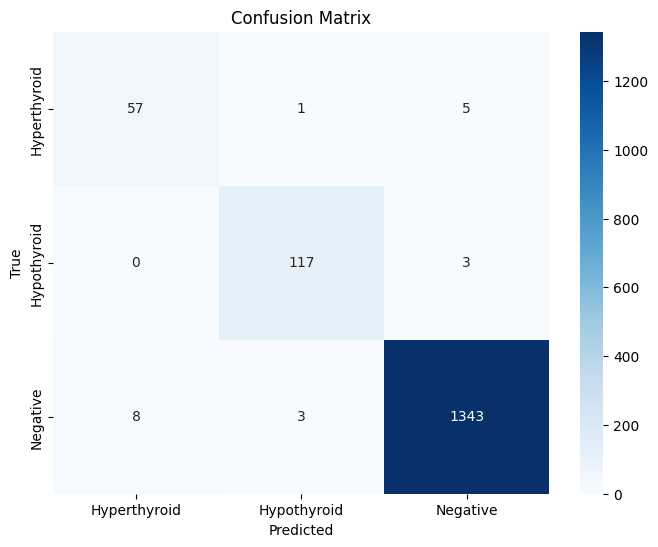

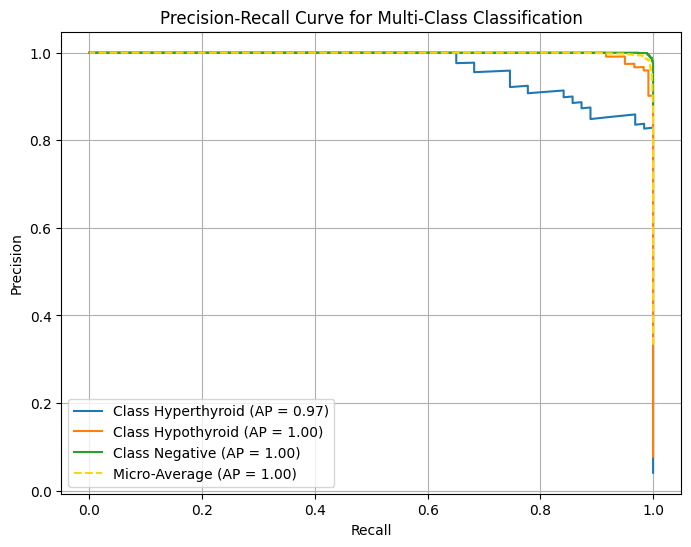

In [112]:
# Load the saved model from the pickle file
with open('final_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Evaluate the loaded model
from sklearn.metrics import *

y_pred = loaded_model.predict(x_test)
y_score = loaded_model.predict_proba(x_test)
# Binarize the target for multiclass precision
y_test_binarized = label_binarize(y_test, classes=lr.classes_)

# Confusion Matrix, Accuracy and Average Precision Score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
average_precision = average_precision_score(y_test_binarized, y_score, average='micro')

print("Confusion Matrix:")
print(cm)
print(f"\n Accuracy: {accuracy:.4f}")
print(f"\n Average Precision (Micro): {average_precision:.4f}\n")
# Compute Average Precision Score for each class
average_precisions = []
for i, class_label in enumerate(lr.classes_):
    avg_precision = average_precision_score(y_test_binarized[:, i], y_score[:, i])
    average_precisions.append(avg_precision)
    print(f'Class {class_label}: Average Precision = {avg_precision}')
print('\n')

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Hyperthyroid', 'Hypothyroid', 'Negative'], 
            yticklabels=['Hyperthyroid', 'Hypothyroid', 'Negative'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("\n")

# Custom AU-PRC function
def plot_au_prc(y_test_data, y_score_data):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    from sklearn.preprocessing import label_binarize
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Binarize the labels for multi-class OvR
    classes = np.unique(y_test_data)
    y_true_binarized = label_binarize(y_test_data, classes=classes)
    
    # Store precision-recall metrics for each class
    precision_dict = {}
    recall_dict = {}
    average_precision_dict = {}
    
    for i, class_label in enumerate(classes):
        precision_dict[class_label], recall_dict[class_label], _ = precision_recall_curve(
            y_true_binarized[:, i], y_score_data[:, i]
        )
        average_precision_dict[class_label] = average_precision_score(
            y_true_binarized[:, i], y_score_data[:, i]
        )
    
    # Compute micro-average PR curve
    precision_micro, recall_micro, _ = precision_recall_curve(
        y_true_binarized.ravel(), y_score_data.ravel()
    )
    average_precision_micro = average_precision_score(y_true_binarized, y_score_data, average="micro")
    
    # Plot Precision-Recall Curve
    plt.figure(figsize=(8, 6))
    for class_label in classes:
        plt.plot(
            recall_dict[class_label], 
            precision_dict[class_label], 
            label=f"Class {class_label} (AP = {average_precision_dict[class_label]:.2f})"
        )
    
    # Add micro-average curve
    plt.plot(
        recall_micro, 
        precision_micro, 
        label=f"Micro-Average (AP = {average_precision_micro:.2f})", 
        color='gold', linestyle='--'
    )
    
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve for Multi-Class Classification")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Plot AU-PRC
plot_au_prc(y_test, y_score)

**Model Summary** 

From the above metrics, I got the following results:
| <font size = 3>**Metric**     | <font size = 3>**Value** |
|-------------------------------|--------------------------|
| **Accuracy**                  | 98.70%                   |
| **Average Precision (Micro)** | 99.92%                   |
| **AU-PRC for Hyperthyroid**   | 97.00%                   |
| **AU-PRC for Hypothyroid**    | 100.00%                  |
| **AU-PRC for Negative**       | 100.00%                  |

-------------------------------------------------------------------------------
# Next Steps

**1. Deployment:** Develop a scalable deployment pipeline, integrating the model into a clinical decision-support system for real-time predictions.

**2. Monitoring and Maintenance:** Set up a monitoring framework to track the model's performance over time, ensuring it remains accurate and unbiased in production.

**3. User Feedback:** Collect feedback from clinicians and stakeholders to refine the system and improve usability.

**4. Model Updates:** Periodically retrain the model with new data to adapt to changing trends and improve performance on underrepresented conditions.

**5. Research Extensions:** Explore the use of advanced techniques, such as ensemble learning or hybrid models, to further boost accuracy.

--------------
# Future Considerations

- **Cross-validation.**: Implement k-fold cross-validation to ensure the model's performance is consistent across different subsets of the data, providing better generalizability.

- **External Validation:** Validate the model on an entirely independent dataset, possibly from a different population or region, to test its robustness and applicability.

- **Addressing Class Imbalance:**  Collect more data for the "Hyperthyroid" and "Hypothyroid" classes, as these are underrepresented compared to the "Negative" class. This could enhance the model's ability to distinguish these conditions effectively.
- **Interpretability:** Utilize interpretability tools such as SHAP (SHapley Additive Explanations) or LIME (Local Interpretable Model-Agnostic Explanations) to provide insights into individual predictions. This is particularly important in a clinical setting to build trust and transparency.
- **Hyperparameter Tuning:** Explore additional hyperparameter tuning for the CatBoost model, especially focusing on regularization parameters, depth, and learning rate, to achieve even better performance.